# CUSTOMER PERSONALITY ANALYSIS



## PROBLEM STATEMENT

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## ATTRIBUTES

### PEOPLE:

 - ID: Customer's unique identifier


 - Year_Birth: Customer's birth year


 - Education: Customer's education level


 - Marital_Status: Customer's marital status


 - Income: Customer's yearly household income


 - Kidhome: Number of children in customer's household


 - Teenhome: Number of teenagers in customer's household


 - Dt_Customer: Date of customer's enrollment with the company


 - Recency: Number of days since customer's last purchase


 - Complain: 1 if the customer complained in the last 2 years, 0 otherwise


### PRODUCTS:

 - MntWines: Amount spent on wine in last 2 years


 - MntFruits: Amount spent on fruits in last 2 years


 - MntMeatProducts: Amount spent on meat in last 2 years


 - MntFishProducts: Amount spent on fish in last 2 years


 - MntSweetProducts: Amount spent on sweets in last 2 years


 - MntGoldProds: Amount spent on gold in last 2 years

### PROMOTION:

 - NumDealsPurchases: Number of purchases made with a discount


 - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise


 - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise


 - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise


 - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise


 - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise


 - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### PLACE:

 - NumWebPurchases: Number of purchases made through the company’s website


 - NumCatalogPurchases: Number of purchases made using a catalogue


 - NumStorePurchases: Number of purchases made directly in stores


 - NumWebVisitsMonth: Number of visits to company’s website in the last month

### TARGET

Need to perform clustering to summarize customer segments.

## IMPORTING LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime
from datetime import date

In [2]:
data = pd.read_excel('marketing_campaign1.xlsx')

In [3]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


# EXPLORATORY DATA ANALYSIS


## INITIAL ANALYSIS

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [5]:
data.shape

(2240, 29)

In [6]:
data.duplicated().sum()

0

In [7]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

 - From the above cell "Z_CostContact","Z_Revenue" have the same values in their rows and their are not able to contribute in the model building. So that we can drop them.

In [8]:
data = data.drop(columns=['Z_CostContact','Z_Revenue'],axis = 1)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [10]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

Observations:

1. Data contains 2240 rows and 29 columns.

2. It has 1 float, 3 object and 25 int columns.

3. There are no duplicate values within data.

4. There are 24 missing values in Income column.

## UNIVARIATE ANALYSIS WITH DATA VISUALIZATION

### PERFORMING ANALYSIS ON PEOPLE ATTRIBUTES

#### 1. ID - Customer's unique identifier

Non-informative: If the "id" column contains unique identifiers for each customer, it may not provide any meaningful insights or predictive value for your analysis. In such cases, removing the column avoids unnecessary noise in the data.

In [11]:
data = data.drop(columns=['ID'],axis = 1)

 - ID has all unique values, so we can drop them


#### 2. Year_Birth - Customer's Birth Year

Intuitive interpretation: Age is a commonly understood and easily interpretable variable. It provides a direct understanding of a customer's age in years, which can be more meaningful than dealing with birth years.


In [12]:
#Converting the Year_Birth to customer_Age

#Replacing the Year_Birth column with "Customer_Age"


data['Customer_Age'] = (pd.Timestamp('now').year) - data['Year_Birth']
data = data.drop(columns=['Year_Birth'],axis = 1)
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age
0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,...,4,7,0,0,0,0,0,0,1,66
1,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,...,2,5,0,0,0,0,0,0,0,69
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,10,4,0,0,0,0,0,0,0,58
3,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,...,4,6,0,0,0,0,0,0,0,39
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,6,5,0,0,0,0,0,0,0,42


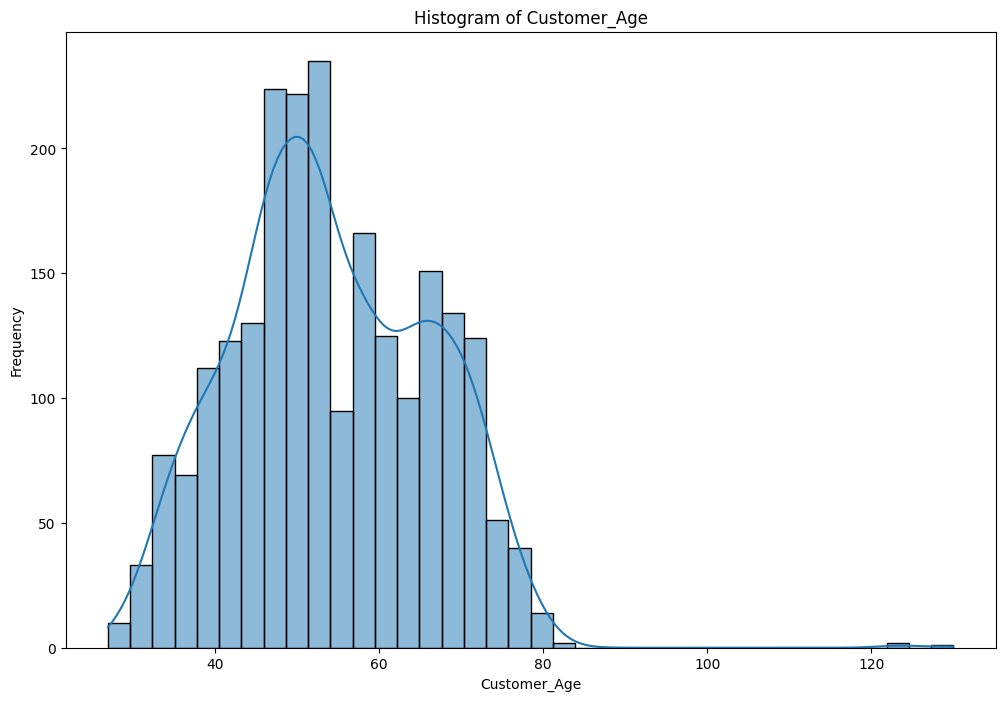

In [13]:
#Visualizing 'Customer_Age' Column:-

import matplotlib.pyplot as plt
import seaborn as sns

def hist_V(col):
    plt.figure(figsize=(12, 8))
    sns.histplot(data[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

hist_V('Customer_Age')


 - As we can see from the barplot, most customers are from the range of 43–59 years old.

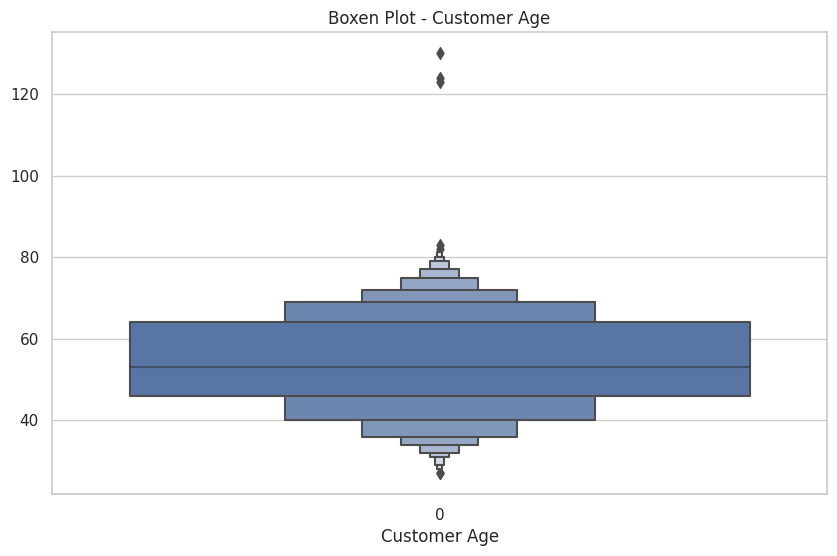

In [14]:
#Checking the outliers present in Customer's Age

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxenplot(data["Customer_Age"])
plt.xlabel("Customer Age")
plt.title("Boxen Plot - Customer Age")
plt.show()

 - As we can see from the above boxplot there are outliers which we need to take care of as the Customer_Age is more than 90 Years.

In [15]:
#Removing the outliers from the Customer's_Age

data = data[data['Customer_Age'] < 90]

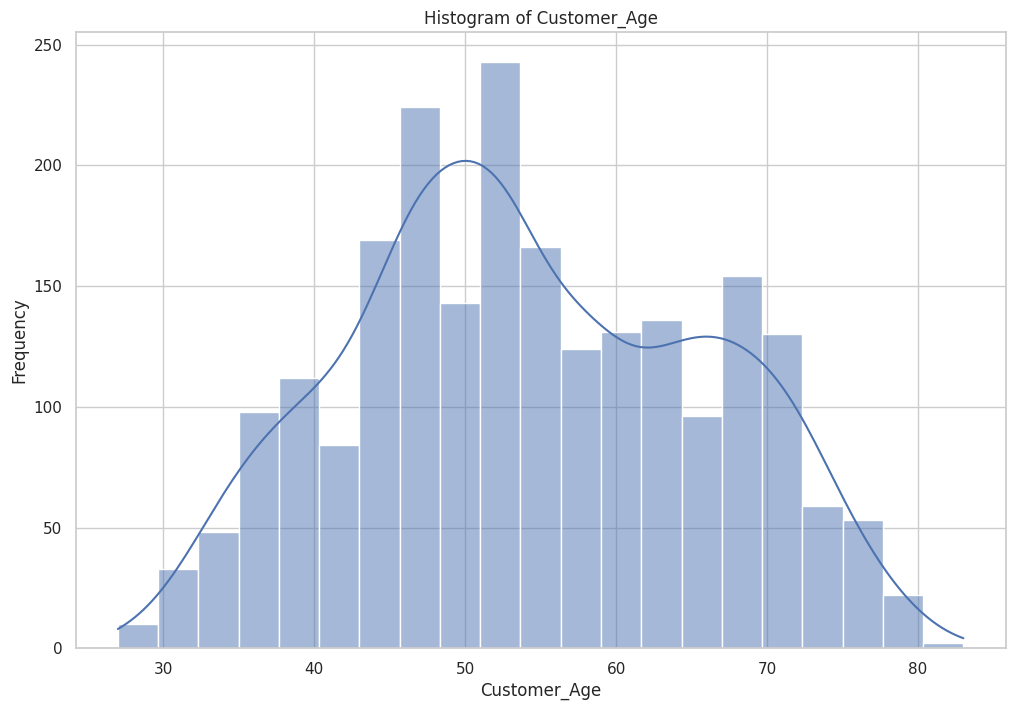

In [16]:
#Visualizing after removing outliers

def hist_V(col):
    plt.figure(figsize=(12, 8))
    sns.histplot(data[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

hist_V('Customer_Age')

####  3.EDUCATION - Customer's education level

In [17]:
#Converting Education Features into 'High','Middle' & 'Low'

def education_level(education):
    if education in ['Graduation','Phd','Master']:
        return 'High'
    elif education in ['Basic']:
        return 'Middle'
    else:
        return 'Low'

data['Education_Level'] = data['Education'].apply(education_level)

#Replacing "Education" with "Education_Level"

data = data.drop(columns=['Education'],axis = 1)

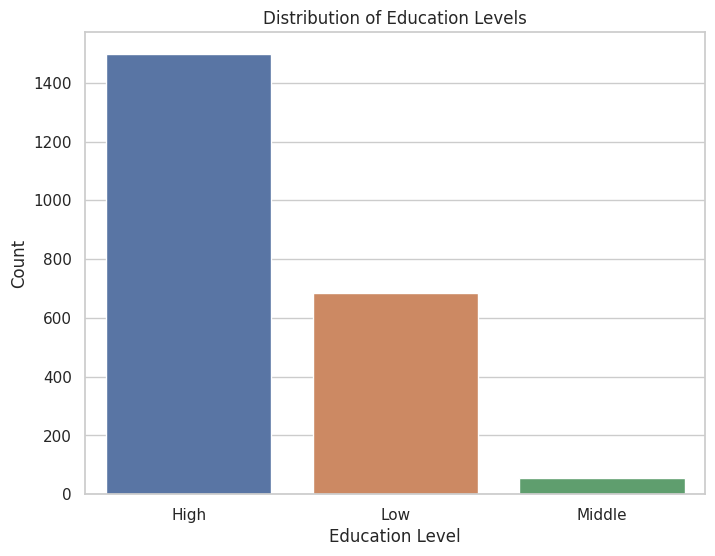

In [18]:
#Visualizing 'Education' Attribute:-

education_counts = data['Education_Level'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.show()

#### 4.Marital_Status - Customer's marital status

In [19]:
#Converting Marital_Status into 'Relationship' and 'Single'

data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'],'Relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

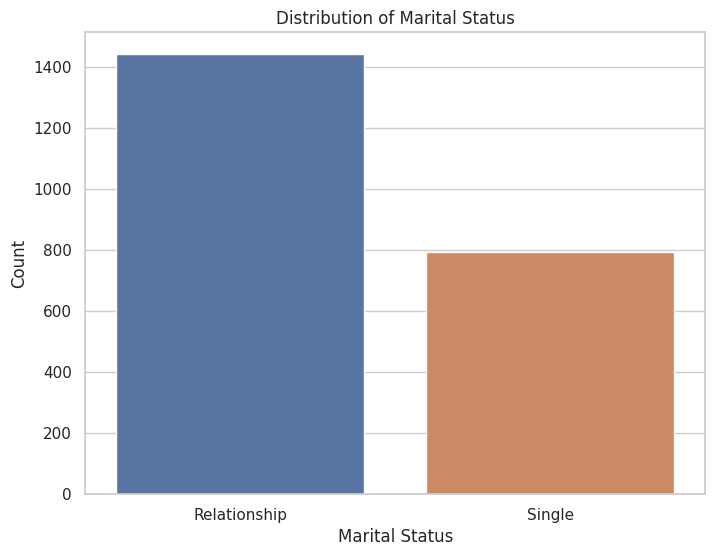

In [20]:
#Visualizing 'Marital_Status' Attribute:-

marital_counts = data['Marital_Status'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=marital_counts.index, y=marital_counts.values)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')
plt.show()

#### 5.INCOME - Customer's yearly household income

 - Since there are 24 Null Values in Income we will repalce the missing values with "Mean" or "Median"


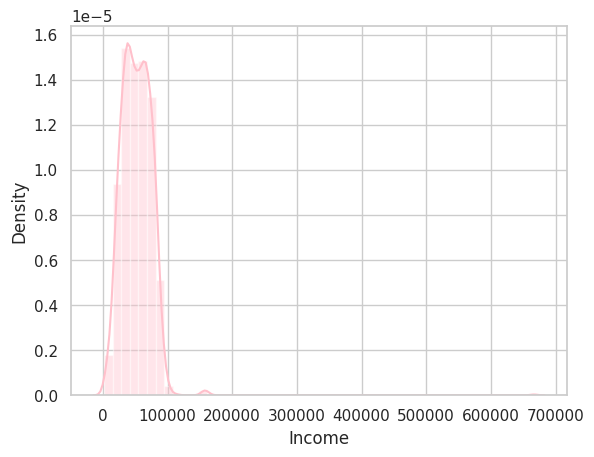

In [21]:
sns.distplot(data['Income'],color = "pink")
plt.show()


 - Hence the data is left skewed we will replace the missing values with "Median"


In [22]:
#Fill the missing values with median values

data['Income']=data['Income'].fillna(data['Income'].median())

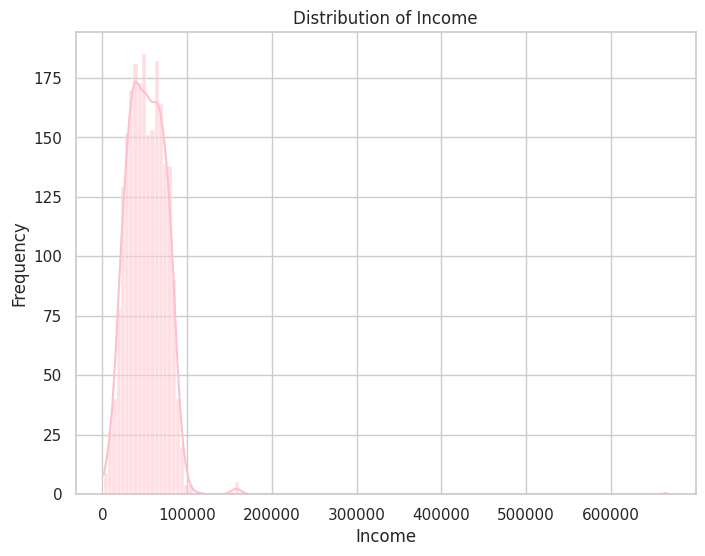

In [23]:
#Visualizing 'Income' Attribute:-

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(data['Income'], color="pink", kde=True)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

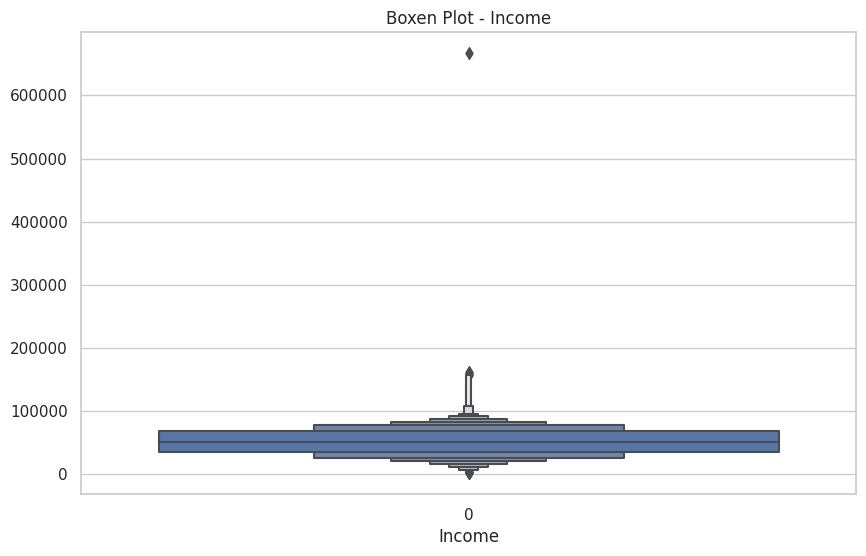

In [24]:
#Let's Check if there are any "Outliers" present in the "Income" Attribute


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxenplot(data["Income"])
plt.xlabel("Income")
plt.title("Boxen Plot - Income")
plt.show()

 - There is an Outlier Present in the "Income" Attribute where Customer Income is more the "600000"

In [25]:
#Removing the Outliers from the "Income" Attribute

data = data[data['Income'] < 600000]

#### 6. "Kidhome" -  Number of children in customer's household & "Teenhome" - Number of teenagers in customer's household

In [26]:
#Creating "Is_Parent" Column by Grouping "Kidhomme" & "Teenhome" to indicate Parenthood Status

data['Is_Parent'] = (data['Kidhome'] + data['Teenhome']>0).astype(int)

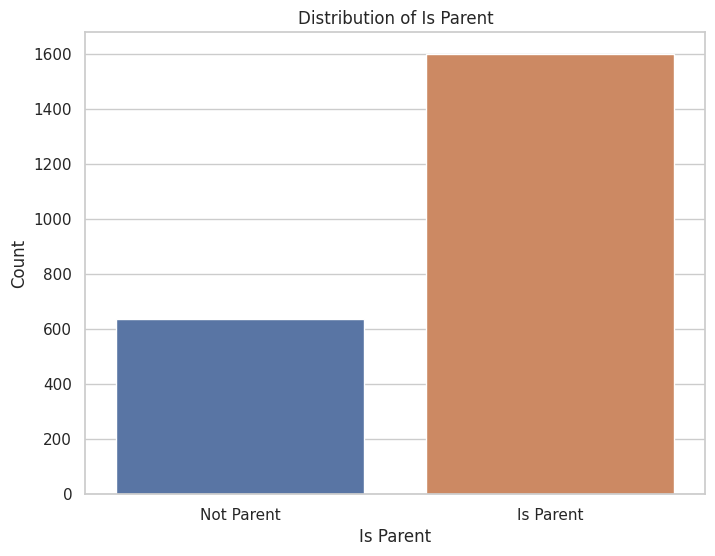

In [27]:
#Visualizing "Kidhome" & "Teenhome":-

is_parent_counts = data['Is_Parent'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=is_parent_counts.index, y=is_parent_counts.values)
plt.xlabel('Is Parent')
plt.ylabel('Count')
plt.title('Distribution of Is Parent')
plt.xticks([0, 1], ['Not Parent', 'Is Parent'])
plt.show()

In [28]:
#Combining "Kidhome","Teenhome"  into a single column "kids" to reduce the number of dimensions.

data['Kids'] = data['Kidhome'] + data['Teenhome']

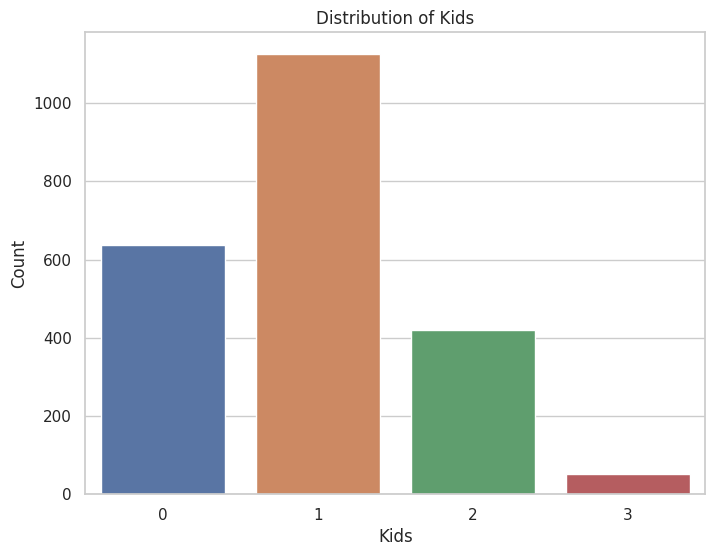

In [29]:
#Visualizing "Kidhome" & "Teenhome":-

is_parent_counts = data['Kids'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=is_parent_counts.index, y=is_parent_counts.values)
plt.xlabel('Kids')
plt.ylabel('Count')
plt.title('Distribution of Kids')
plt.show()

In [30]:
#Replacing Kidhome and Teenhome by "Kids" and "Is_Parent"

data = data.drop(columns=['Kidhome','Teenhome'],axis = 1)

#### 7.Dt_Customer -  Date of customer's enrollment with the company & Recency - Number of days since customer's last purchase

In [31]:
#Converting Dt_Customer to "Customer_For"

data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)

#Created a feature "Customer_For"

days = []
d1 = max(dates) #Taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data['Customer_For'] = data['Customer_For'].apply(lambda x:x.days)

#Dropping "Dt_Customer" and "Recency"

data = data.drop(columns=['Dt_Customer','Recency'],axis = 1)
data.head()

,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age,Education_Level,Is_Parent,Kids,Customer_For
0,Single,58138.0,635,88,546,172,88,88,3,8,...,0,0,0,0,1,66,High,0,0,663
1,Single,46344.0,11,1,6,2,1,6,2,1,...,0,0,0,0,0,69,High,1,2,113
2,Relationship,71613.0,426,49,127,111,21,42,1,8,...,0,0,0,0,0,58,High,0,0,312
3,Relationship,26646.0,11,4,20,10,3,5,2,2,...,0,0,0,0,0,39,High,1,1,139
4,Relationship,58293.0,173,43,118,46,27,15,5,5,...,0,0,0,0,0,42,Low,1,1,161


OBSERVATIONS ON PEOPLE ATTRIBUTE:-

1. We have dropped "id" as it has only unique values.
2. We are converted "Year_Birth" attribute into "Customer_Age". And also, we have removed outliers in this column.
3. We have converted "Education" attribute into "Education_Levl".
4. We have converted "Martial_Status" categories into "Single" and "Relationship".
5. We have removed outliers present in "Income" column.
6. With "Kidhome" and "Teenhome" we have created 2 columns i.e "Kids" & "Is_Parent".
7. With "Dt_Customer" and "Recency" we created a new column as "Customer_for".

### PERFORMING ANALYSIS ON PRODUCT ATTRIBUTES

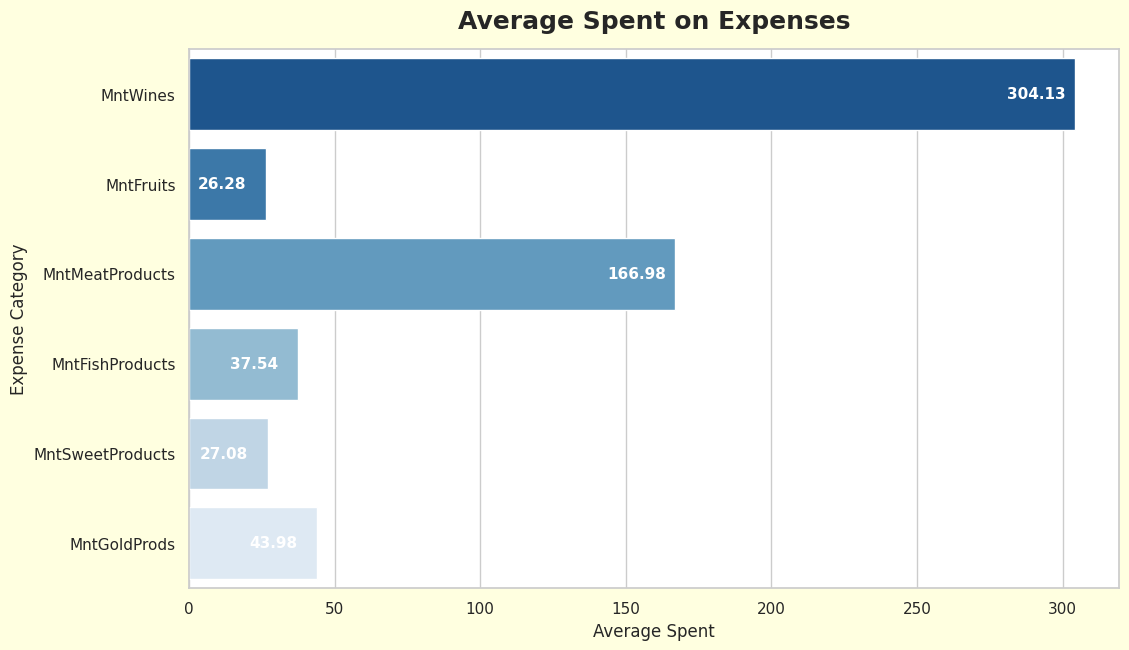

In [32]:
# Creating "Average_Spent" Column
data['Average_Spent'] = (data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds'])/6


# Calculate the average spent on expenses for each category
expenses_avg = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Set the plot style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 7), facecolor='lightyellow')
ax = sns.barplot(x=expenses_avg.values, y=expenses_avg.index, palette='Blues_r')
plt.title('Average Spent on Expenses', pad=15, fontsize=18, fontweight='semibold')
plt.xlabel('Average Spent')
plt.ylabel('Expense Category')

# Add value annotations to the bars
rects = ax.patches
for rect, value in zip(rects, expenses_avg.values):
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    plt.annotate('{:.2f}'.format(value), (x_value, y_value), xytext=(-49, 0),
                 textcoords='offset points', va='center', ha='left',
                 color='white', fontsize=11, fontweight='semibold')

plt.show()


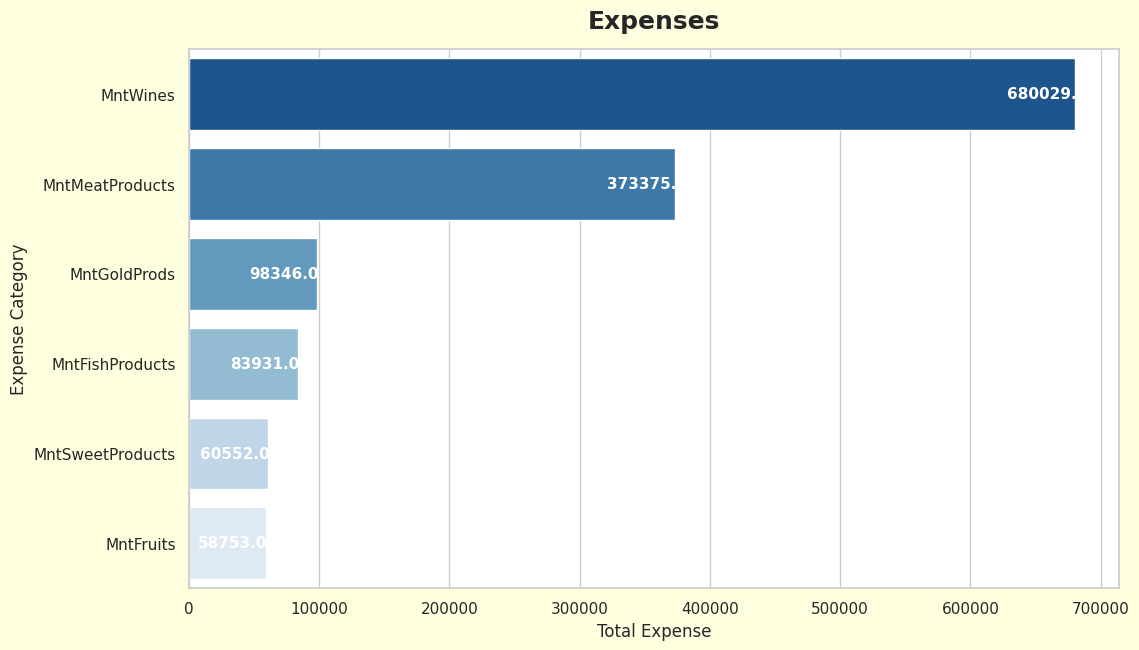

In [33]:
# Calculate the sum of expenses for each category
expenses_sum = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=False)

# Set the plot style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 7), facecolor='lightyellow')
ax = sns.barplot(y=expenses_sum.index, x=expenses_sum, orient='h', palette='Blues_r')
plt.title('Expenses', pad=15, fontsize=18, fontweight='semibold')
plt.xlabel('Total Expense')
plt.ylabel('Expense Category')

# Add value annotations to the bars
rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-49, 0),
                 textcoords='offset points', va='center', ha='left',
                 color='white', fontsize=11, fontweight='semibold')

plt.show()

#Dropping grouped columns

data = data.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],axis = 1)


 - The highest amount spent by the customers on "MntWines"

### PERFORMING ANALYSIS ON PROMOTION ATTRIBUTES

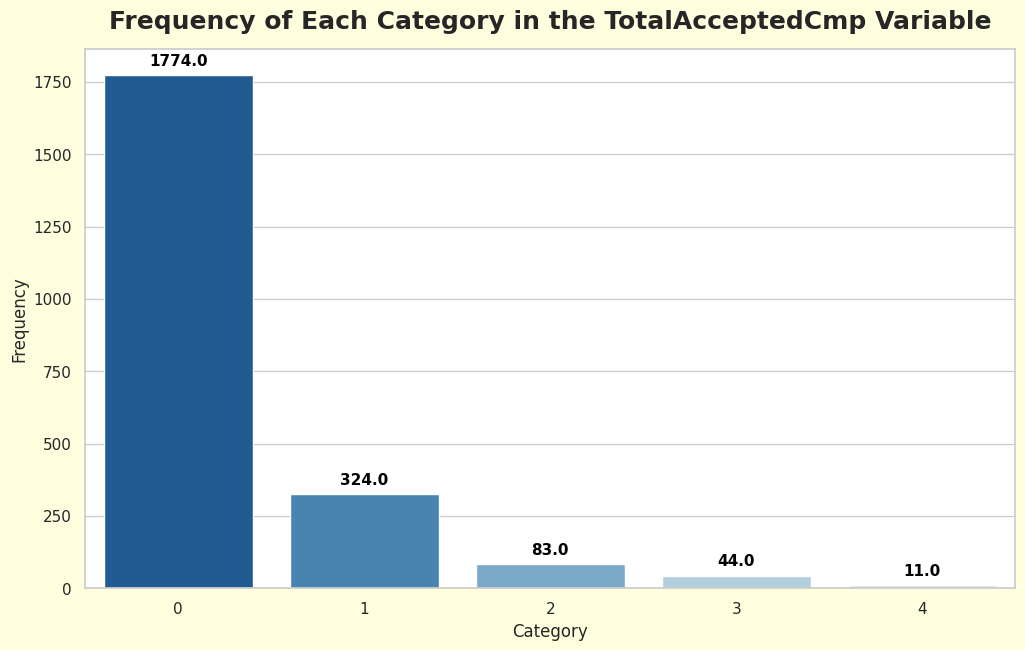

In [34]:
# Combine all the Promotions into a single column
data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

# Set the plot style
sns.set(style="whitegrid")

# Calculate the frequency of each category in the TotalAcceptedCmp variable
total_accepted_cmp_counts = data['TotalAcceptedCmp'].value_counts()

# Create the bar plot
plt.figure(figsize=(12, 7), facecolor='lightyellow')
ax = sns.barplot(x=total_accepted_cmp_counts.index, y=total_accepted_cmp_counts, palette='Blues_r')
plt.title('Frequency of Each Category in the TotalAcceptedCmp Variable', pad=15, fontsize=18, fontweight='semibold')
plt.xlabel('Category')
plt.ylabel('Frequency')

# Add value annotations to the bars
rects = ax.patches
for rect in rects:
    x_value = rect.get_x() + rect.get_width() / 2
    y_value = rect.get_height()
    plt.annotate('{}'.format(y_value), (x_value, y_value), xytext=(0, 5),
                 textcoords='offset points', va='bottom', ha='center',
                 color='black', fontsize=11, fontweight='semibold')

plt.show()

# Remove the individual AcceptedCmp columns from the dataset
data = data.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis=1)


 - 79.33% of Customers accepted the offer in the campaign are "0".
 - 14.50% of Customers accepted the offer in the campaign are "1".
 - 3.70% of Customers accepted the offer in the campaign are "2".
 - 1.96% of Customers accepted the offer in the campaign are "3".
 - 0.49% of Customers accepted the offer in the campaign are "4".

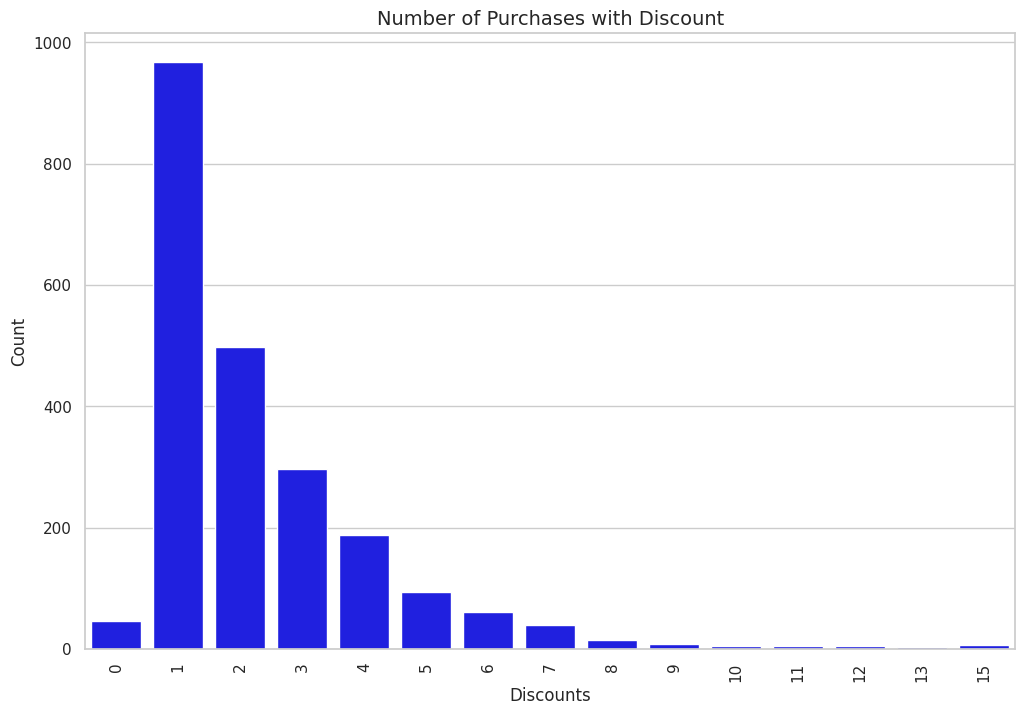

In [35]:
#NumDealsPurchases

def bar_plot(col):
    plt.figure(figsize=(12, 8))
    count_data = data[col].value_counts().reset_index()
    count_data.columns = [col, 'Count']
    sns.barplot(x=col, y='Count', data=count_data, color='blue')
    plt.title('Number of Purchases with Discount', fontsize=14)
    plt.xlabel('Discounts')
    plt.ylabel('Count')

    # Rotate x-axis labels if needed
    plt.xticks(rotation=90)

    plt.show()

bar_plot('NumDealsPurchases')

### PERFORMING ANALYSIS ON PLACE ATTRIBUTES

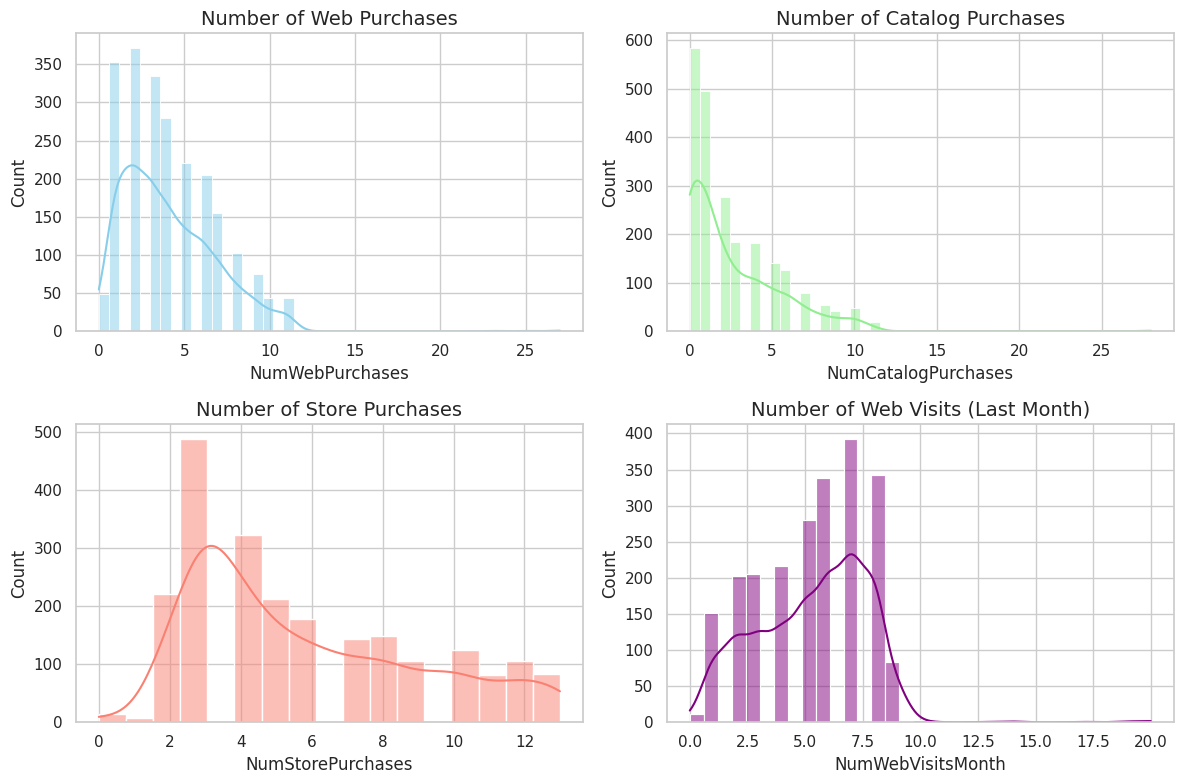

In [36]:
#Visualizing the "Place" Attribute

# Set the overall figure size
plt.figure(figsize=(12, 8))

# Create subplots for each variable
plt.subplot(2, 2, 1)
sns.histplot(data['NumWebPurchases'], kde=True, color='skyblue')
plt.title('Number of Web Purchases', fontsize=14)
plt.xlabel('NumWebPurchases')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.histplot(data['NumCatalogPurchases'], kde=True, color='lightgreen')
plt.title('Number of Catalog Purchases', fontsize=14)
plt.xlabel('NumCatalogPurchases')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.histplot(data['NumStorePurchases'], kde=True, color='salmon')
plt.title('Number of Store Purchases', fontsize=14)
plt.xlabel('NumStorePurchases')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.histplot(data['NumWebVisitsMonth'], kde=True, color='purple')
plt.title('Number of Web Visits (Last Month)', fontsize=14)
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('Count')


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [37]:
#Checking the customer average web vistis

data['avg_web_visits'] = (data['NumWebPurchases'] + data['NumWebVisitsMonth']) / 2


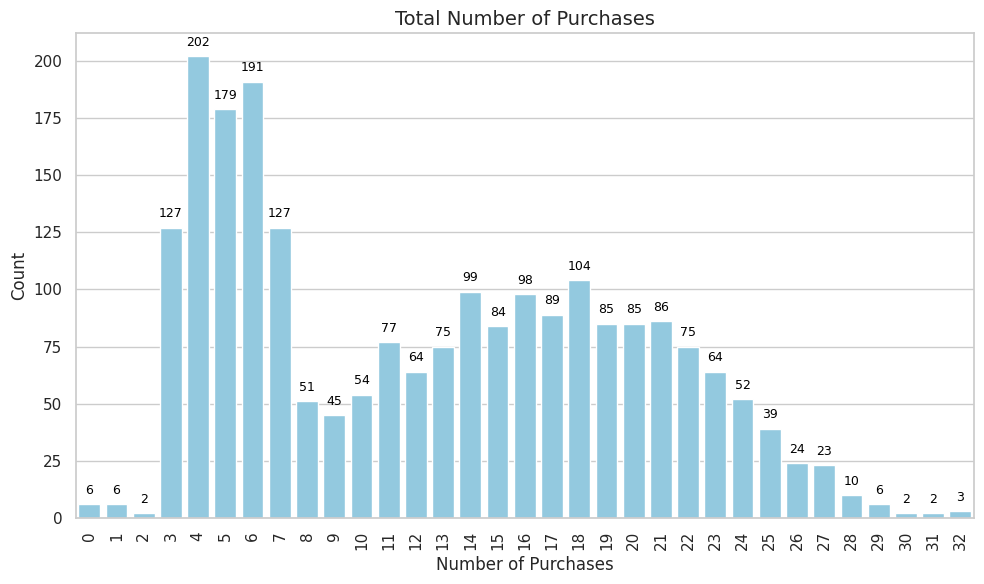

In [38]:
#Grouping all Purchases to "NumtotalPurchases"
data['NumTotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

plt.figure(figsize=(10, 6))
sns.barplot(x=data['NumTotalPurchases'].value_counts().index, y=data['NumTotalPurchases'].value_counts().values, color='skyblue')
plt.title('Total Number of Purchases', fontsize=14)
plt.xlabel('Number of Purchases')
plt.ylabel('Count')

# Annotate the count values on top of each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9, color='black')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


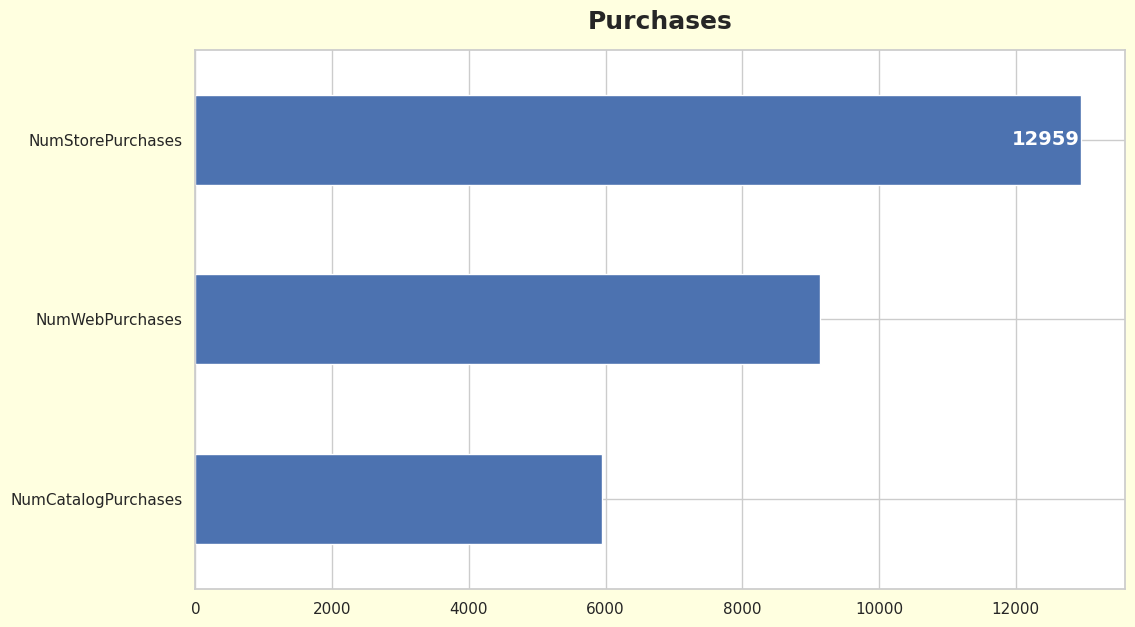

In [39]:
plt.figure(figsize=(12,7), facecolor='lightyellow')
ax = data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Purchases', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:x_value = rect.get_width()
y_value = rect.get_y() + rect.get_height() / 2
plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-50, 0),
textcoords='offset points', va='center', ha='left', color = 'white', fontsize=14, fontweight='semibold')

#Dropping grouped Columns

data = data.drop(columns=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'],axis = 1)


### CORRELATION

In [40]:
data.corr()

,Income,NumDealsPurchases,Complain,Response,Customer_Age,Is_Parent,Kids,Customer_For,Average_Spent,TotalAcceptedCmp,avg_web_visits,NumTotalPurchases
Income,1.000000,-0.107169,-0.027871,0.161122,0.198835,-0.401362,-0.340552,-0.023677,0.789376,0.364482,-0.088140,0.738648
NumDealsPurchases,-0.107169,1.000000,0.003636,0.002017,0.068286,0.387438,0.439682,0.218009,-0.064831,-0.123837,0.416362,0.117669
Complain,-0.027871,0.003636,1.000000,0.000167,0.004450,0.017866,0.031480,0.035685,-0.033784,-0.020699,0.003802,-0.017754
Response,0.161122,0.002017,0.000167,1.000000,-0.018557,-0.205278,-0.169451,0.194232,0.265615,0.426206,0.112060,0.164292
Customer_Age,0.198835,0.068286,0.004450,-0.018557,1.000000,-0.011097,0.095512,-0.016451,0.113618,-0.000164,0.039769,0.173004
Is_Parent,-0.401362,0.387438,0.017866,-0.205278,-0.011097,1.000000,0.797991,0.001263,-0.523277,-0.280742,0.269724,-0.339388
Kids,-0.340552,0.439682,0.031480,-0.169451,0.095512,0.797991,1.000000,-0.025742,-0.498579,-0.243836,0.169308,-0.379999
Customer_For,-0.023677,0.218009,0.035685,0.194232,-0.016451,0.001263,-0.025742,1.000000,0.158764,-0.011539,0.332380,0.162145
Average_Spent,0.789376,-0.064831,-0.033784,0.265615,0.113618,-0.523277,-0.498579,0.158764,1.000000,0.458925,0.064759,0.821091
TotalAcceptedCmp,0.364482,-0.123837,-0.020699,0.426206,-0.000164,-0.280742,-0.243836,-0.011539,0.458925,1.000000,0.036076,0.306985


### HEAT MAP

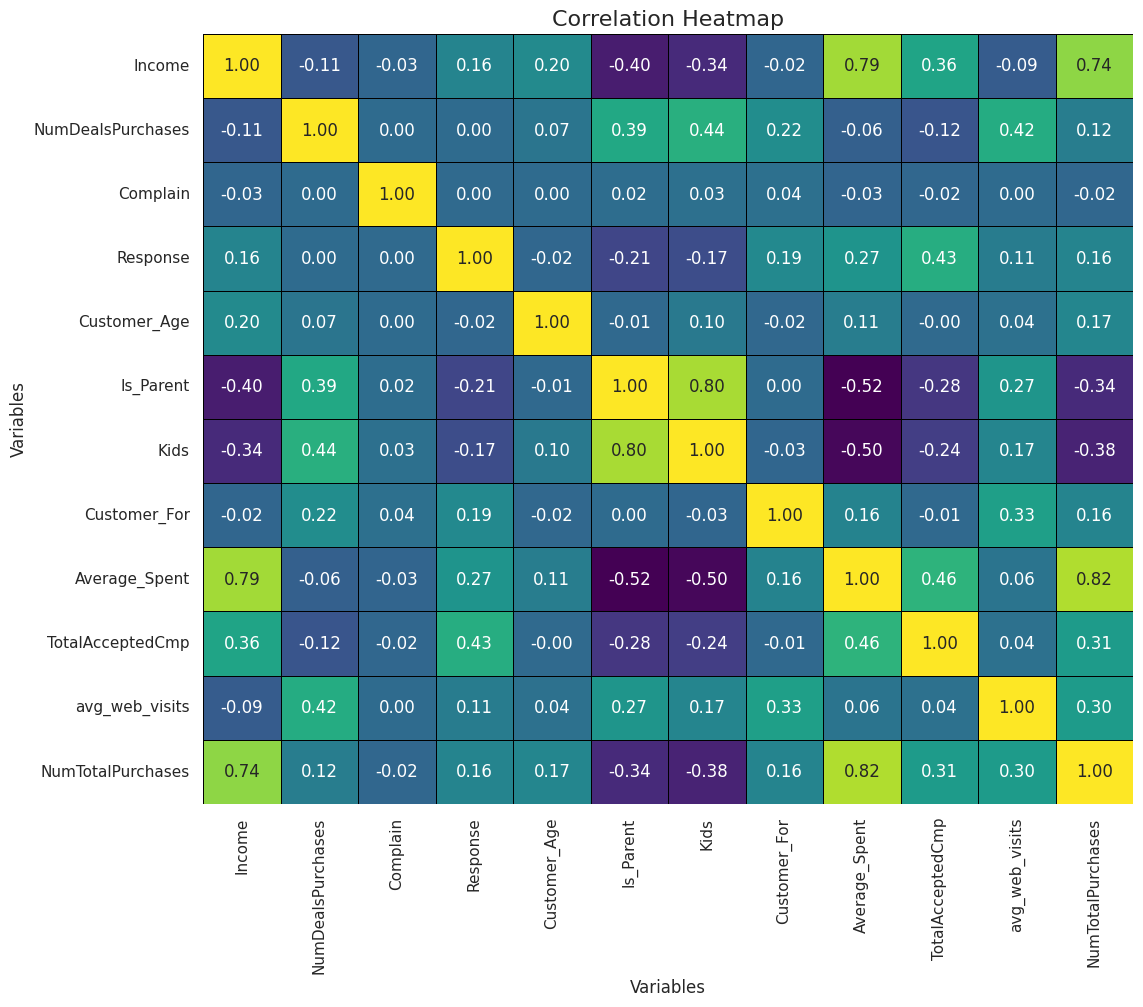

In [41]:
fig, ax = plt.subplots(figsize=(12, 10))

# Compute the correlation matrix
corr_matrix = data.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

# Set the title and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xlabel('Variables')
plt.ylabel('Variables')

plt.show()

## BIVARIATE ANALYSIS WITH DATA VISUALIZATION

#### 1.Income VS Average_Spent

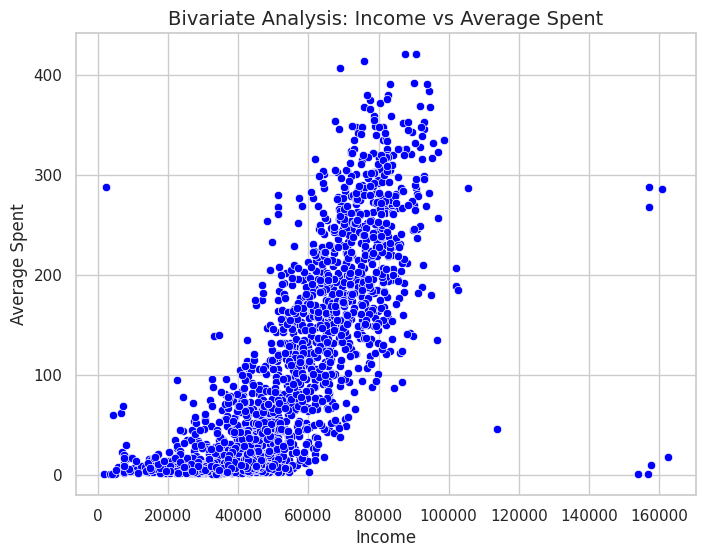

In [42]:
# Bivariate analysis scatter plot

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Income'], y=data['Average_Spent'], color='blue')
plt.title('Bivariate Analysis: Income vs Average Spent', fontsize=14)
plt.xlabel('Income')
plt.ylabel('Average Spent')
plt.show()

#### 2.Income VS Is_Parent

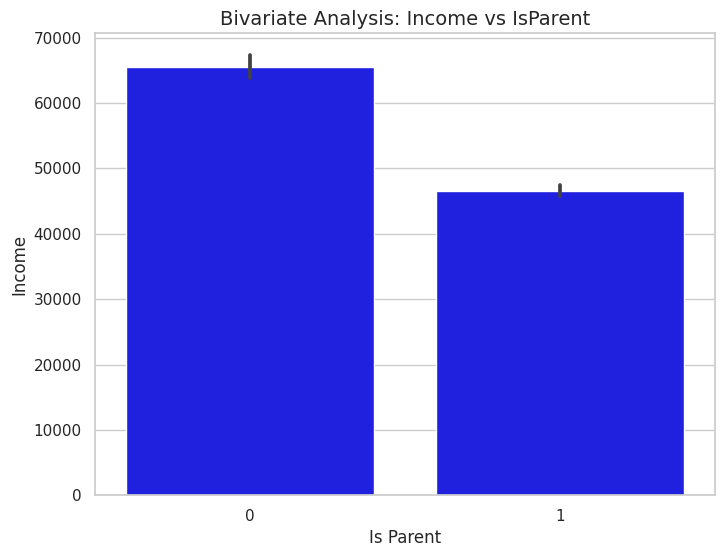

In [43]:
# Bivariate analysis bar plot

plt.figure(figsize=(8, 6))
sns.barplot(x=data['Is_Parent'], y=data['Income'], color='Blue')
plt.title('Bivariate Analysis: Income vs IsParent', fontsize=14)
plt.xlabel('Is Parent')
plt.ylabel('Income')
plt.show()

#### 3. Income VS NumTotalPurchases

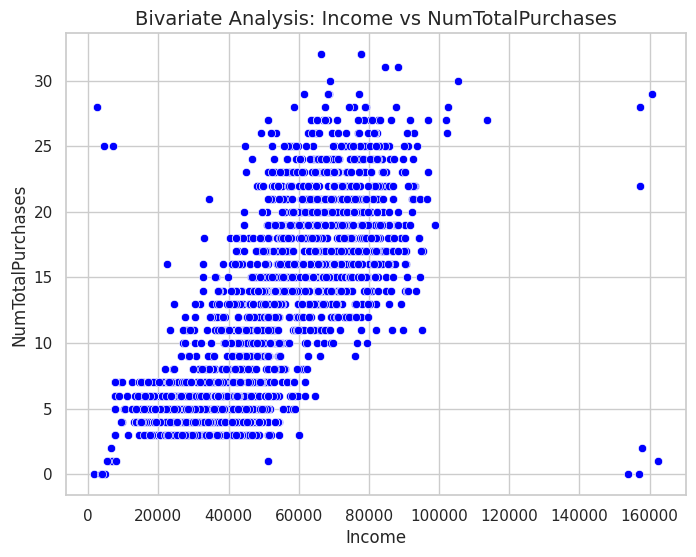

In [44]:
# Bivariate analysis scatter plot

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Income'], y=data['NumTotalPurchases'], color='blue')
plt.title('Bivariate Analysis: Income vs NumTotalPurchases', fontsize=14)
plt.xlabel('Income')
plt.ylabel('NumTotalPurchases')
plt.show()

#### 4.NumDealsPurchases vs Is_Parent

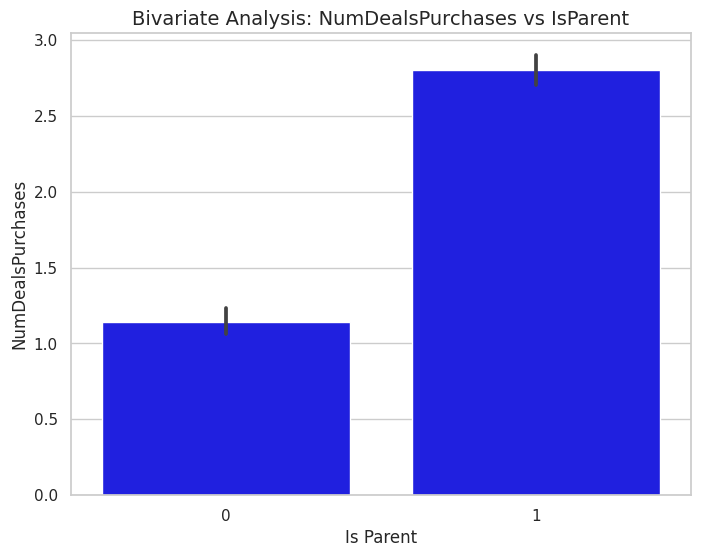

In [45]:
# Bivariate analysis bar plot

plt.figure(figsize=(8, 6))
sns.barplot(x=data['Is_Parent'], y=data['NumDealsPurchases'], color='blue')
plt.title('Bivariate Analysis: NumDealsPurchases vs IsParent', fontsize=14)
plt.xlabel('Is Parent')
plt.ylabel('NumDealsPurchases')
plt.show()


#### 5.NumDealsPurchases vs avg_web_visits

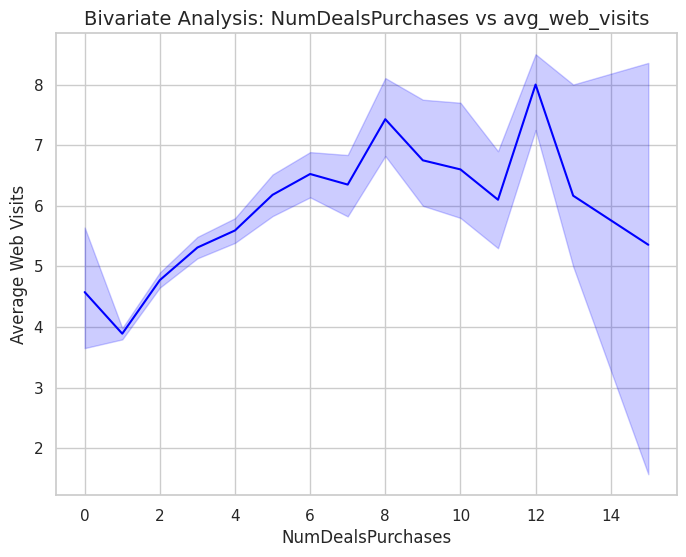

In [46]:
# Bivariate analysis line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x=data['NumDealsPurchases'], y=data['avg_web_visits'], color='blue')
plt.title('Bivariate Analysis: NumDealsPurchases vs avg_web_visits', fontsize=14)
plt.xlabel('NumDealsPurchases')
plt.ylabel('Average Web Visits')
plt.show()

#### 6.Response vs TotalAcceptedCmp

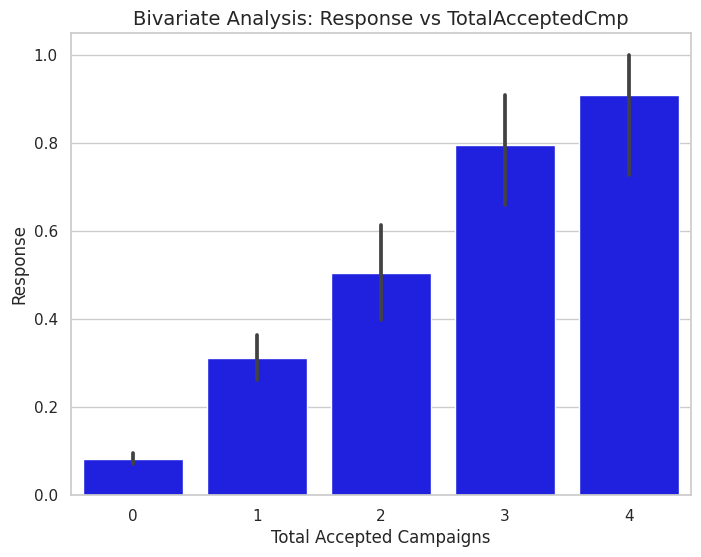

In [47]:
# Bivariate analysis bar plot

plt.figure(figsize=(8, 6))
sns.barplot(x=data['TotalAcceptedCmp'], y=data['Response'], color='blue')
plt.title('Bivariate Analysis: Response vs TotalAcceptedCmp', fontsize=14)
plt.xlabel('Total Accepted Campaigns')
plt.ylabel('Response')
plt.show()

#### 7.Is_Parent vs Average_Spent

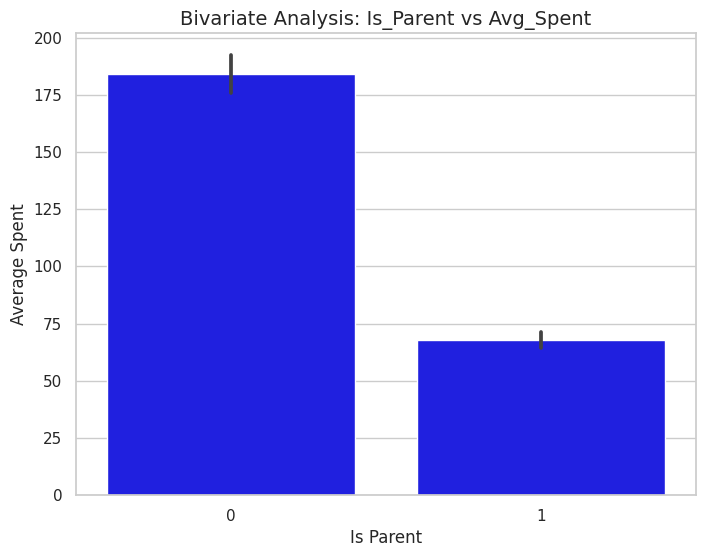

In [48]:
# Bivariate analysis bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=data['Is_Parent'], y=data['Average_Spent'], color='blue')
plt.title('Bivariate Analysis: Is_Parent vs Avg_Spent', fontsize=14)
plt.xlabel('Is Parent')
plt.ylabel('Average Spent')
plt.show()

#### 8.Average_Spent vs TotalAcceptedCmp

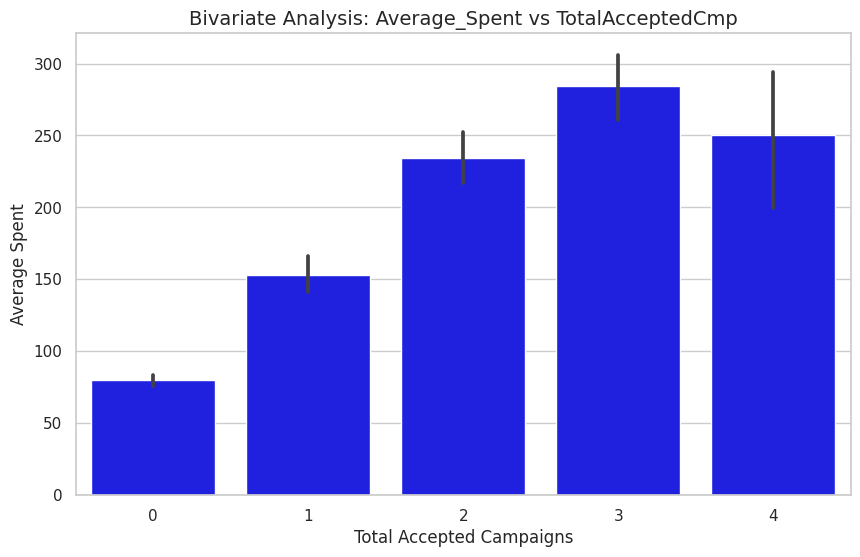

In [49]:
# Bivariate analysis bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=data['TotalAcceptedCmp'], y=data['Average_Spent'], color='blue')
plt.title('Bivariate Analysis: Average_Spent vs TotalAcceptedCmp', fontsize=14)
plt.xlabel('Total Accepted Campaigns')
plt.ylabel('Average Spent')
plt.show()

#### 9.Average_Spent vs NumTotalPurchases

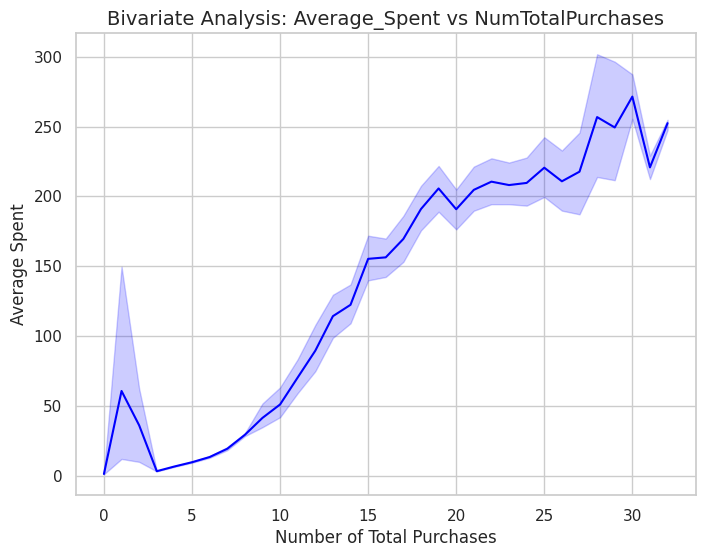

In [50]:
# Bivariate analysis scatter plot
plt.figure(figsize=(8, 6))
sns.lineplot(x=data['NumTotalPurchases'], y=data['Average_Spent'], color='blue')
plt.title('Bivariate Analysis: Average_Spent vs NumTotalPurchases', fontsize=14)
plt.xlabel('Number of Total Purchases')
plt.ylabel('Average Spent')
plt.show()

### LABEL ENCODING

In [51]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()


data['Education_Level'] = label_encoder.fit_transform(data['Education_Level'])
data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status'])

In [52]:
data1 = data.copy()
data1

,Marital_Status,Income,NumDealsPurchases,Complain,Response,Customer_Age,Education_Level,Is_Parent,Kids,Customer_For,Average_Spent,TotalAcceptedCmp,avg_web_visits,NumTotalPurchases
0,1,58138.0,3,0,1,66,0,0,0,663,269.500000,0,7.5,22
1,1,46344.0,2,0,0,69,0,1,2,113,4.500000,0,3.0,4
2,0,71613.0,1,0,0,58,0,0,0,312,129.333333,0,6.0,20
3,0,26646.0,2,0,0,39,0,1,1,139,8.833333,0,4.0,6
4,0,58293.0,5,0,0,42,1,1,1,161,70.333333,0,5.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,2,0,0,56,0,1,1,381,223.500000,0,7.0,16
2236,0,64014.0,7,0,0,77,1,1,3,19,74.000000,1,7.5,15
2237,1,56981.0,1,0,0,42,0,0,0,155,206.833333,1,4.0,18
2238,0,69245.0,2,0,0,67,0,1,1,156,140.500000,0,4.5,21


 - Need to scale the data before feeding it to clustering algorithm


### SCALING

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_scale = ['Marital_Status', 'Income', 'NumDealsPurchases', 'Complain', 'Response',
       'Customer_Age', 'Education_Level', 'Is_Parent', 'Kids', 'Customer_For',
       'Average_Spent', 'TotalAcceptedCmp', 'avg_web_visits',
       'NumTotalPurchases']

data[col_scale] = scaler.fit_transform(data[col_scale])

# CLUSTERING

## K - MEANS

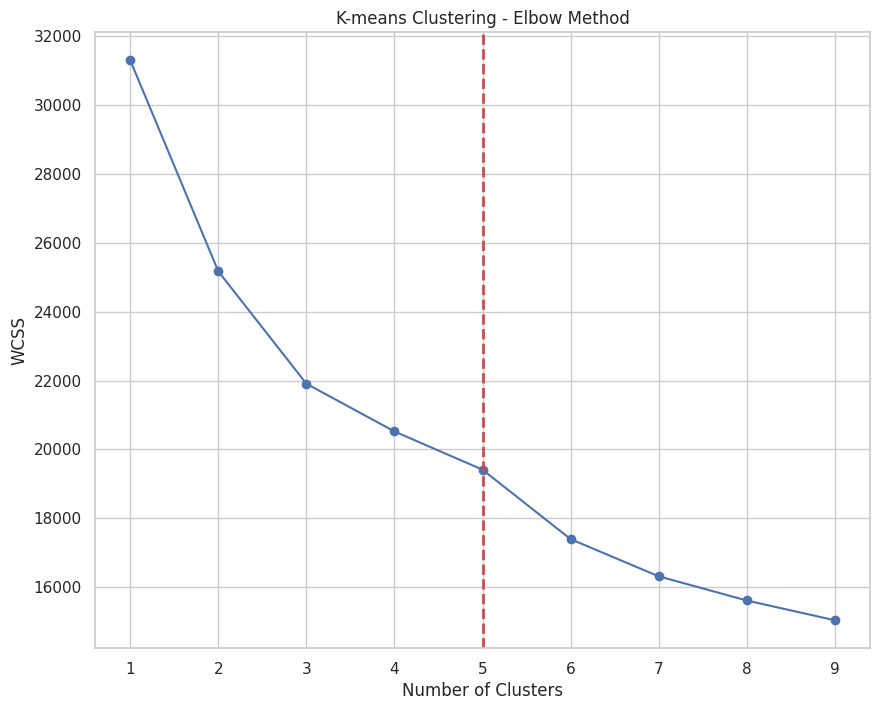

In [54]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []  # List to store the within-cluster sum of squares (WCSS) values

# Iterate over different numbers of clusters
for num_clusters in range(1, 10):
    # Create a K-means clustering model with 'num_clusters' clusters
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)

    # Fit the model to the data and compute the WCSS
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS values
plt.figure(figsize=(10, 8))
plt.plot(range(1, 10), wcss, marker='o')

# Highlighting the optimal number of clusters
plt.axvline(x=5, color='r', linestyle='--', linewidth=2)

plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering - Elbow Method')
plt.grid(True)

plt.show()


In [55]:
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

for i in range(2,10):
  agl =  AgglomerativeClustering(n_clusters=i)
  agl.fit(data1)
  label = agl.labels_
  score = silhouette_score(data1, label)
  print("Untuk k=",i,"silhouette score=",score)

Untuk k= 2 silhouette score= 0.5070090374767051
Untuk k= 3 silhouette score= 0.5150123777739832
Untuk k= 4 silhouette score= 0.49992398737943966
Untuk k= 5 silhouette score= 0.5148807549589172
Untuk k= 6 silhouette score= 0.5039800762292465
Untuk k= 7 silhouette score= 0.49158786806942256
Untuk k= 8 silhouette score= 0.49045204262587483
Untuk k= 9 silhouette score= 0.48901207557740284


As 2 dimensions are not enough to conclude we have checked silhouette score of 3 and 5 are similar (0.51) for both dependding on that and elbow clusters we chose to 5

In [56]:
#Here we have fit the 5 clusters and predicting those clusters

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data)
label = kmeans.predict(data)
data_segment = data1.copy()
data_segment['Segments'] = label

In [57]:
data_segment.groupby(['Segments'])
data_segment

,Marital_Status,Income,NumDealsPurchases,Complain,Response,Customer_Age,Education_Level,Is_Parent,Kids,Customer_For,Average_Spent,TotalAcceptedCmp,avg_web_visits,NumTotalPurchases,Segments
0,1,58138.0,3,0,1,66,0,0,0,663,269.500000,0,7.5,22,2
1,1,46344.0,2,0,0,69,0,1,2,113,4.500000,0,3.0,4,1
2,0,71613.0,1,0,0,58,0,0,0,312,129.333333,0,6.0,20,4
3,0,26646.0,2,0,0,39,0,1,1,139,8.833333,0,4.0,6,1
4,0,58293.0,5,0,0,42,1,1,1,161,70.333333,0,5.0,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,2,0,0,56,0,1,1,381,223.500000,0,7.0,16,0
2236,0,64014.0,7,0,0,77,1,1,3,19,74.000000,1,7.5,15,0
2237,1,56981.0,1,0,0,42,0,0,0,155,206.833333,1,4.0,18,4
2238,0,69245.0,2,0,0,67,0,1,1,156,140.500000,0,4.5,21,0


In [58]:
data_segment.groupby(['Segments']).mean()

,Marital_Status,Income,NumDealsPurchases,Complain,Response,Customer_Age,Education_Level,Is_Parent,Kids,Customer_For,Average_Spent,TotalAcceptedCmp,avg_web_visits,NumTotalPurchases
Segments,,,,,,,,,,,,,,
0,0.339535,58672.502326,4.007752,0.007752,0.117829,57.241860,0.302326,0.984496,1.246512,426.265116,133.385530,0.241860,6.300775,17.727132
1,0.352239,35623.501493,1.941791,0.013433,0.079104,51.676119,0.000000,0.907463,1.249254,314.943284,18.024876,0.073134,4.181343,6.110448
2,0.516304,77703.423913,1.157609,0.005435,0.907609,52.673913,0.364130,0.108696,0.125000,423.114130,259.725543,1.690217,4.671196,19.750000
3,0.332432,35860.102703,1.927027,0.008108,0.078378,51.402703,1.143243,0.886486,1.227027,304.924324,18.035586,0.089189,4.139189,6.121622
4,0.329700,73266.111717,1.059946,0.005450,0.024523,56.449591,0.297003,0.021798,0.021798,311.741144,199.613079,0.318801,3.433243,18.057221


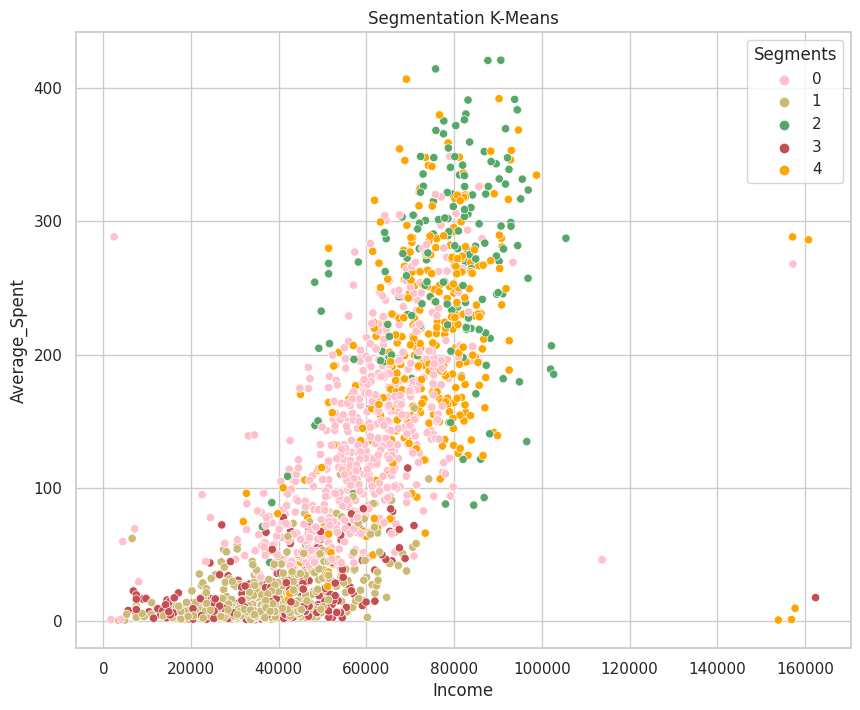

In [59]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Income', y='Average_Spent', data=data_segment, hue='Segments', palette=['pink','y','g','r','orange'])
plt.title('Segmentation K-Means')
plt.show()

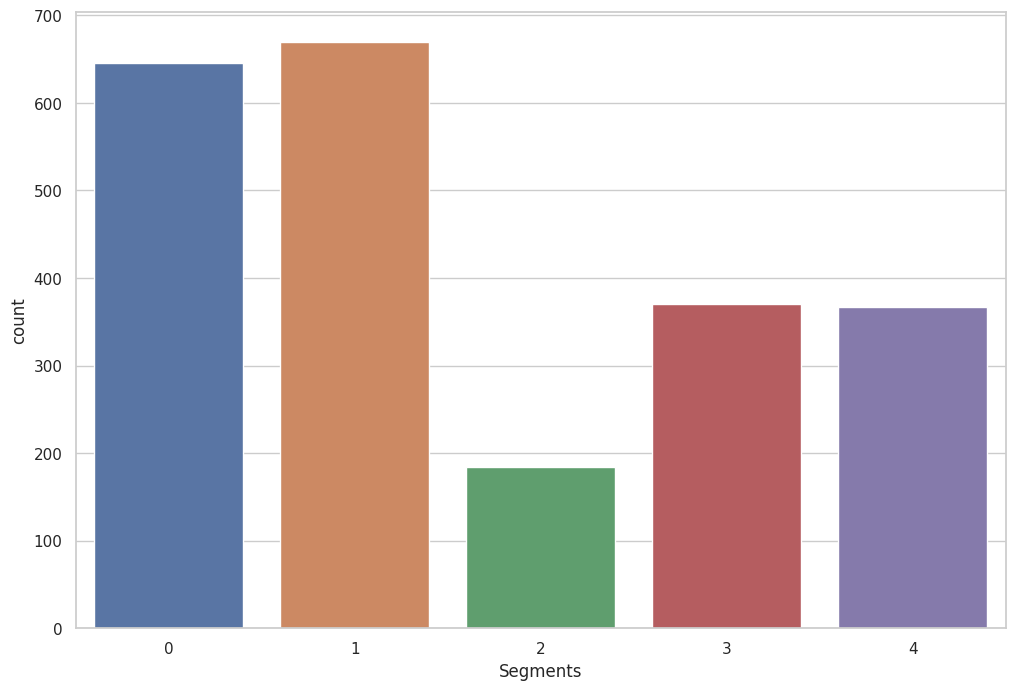

In [60]:
# countplot to see number of customers in each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='Segments', data=data_segment)
plt.show()

 - Cluster 0 has the second largest number of Segments.
 - Cluster 1 has large number of customers among all the Segments.
 - Cluster 2 has least amount of customers.
 - Cluster 3 & 4 has around same number of customers.

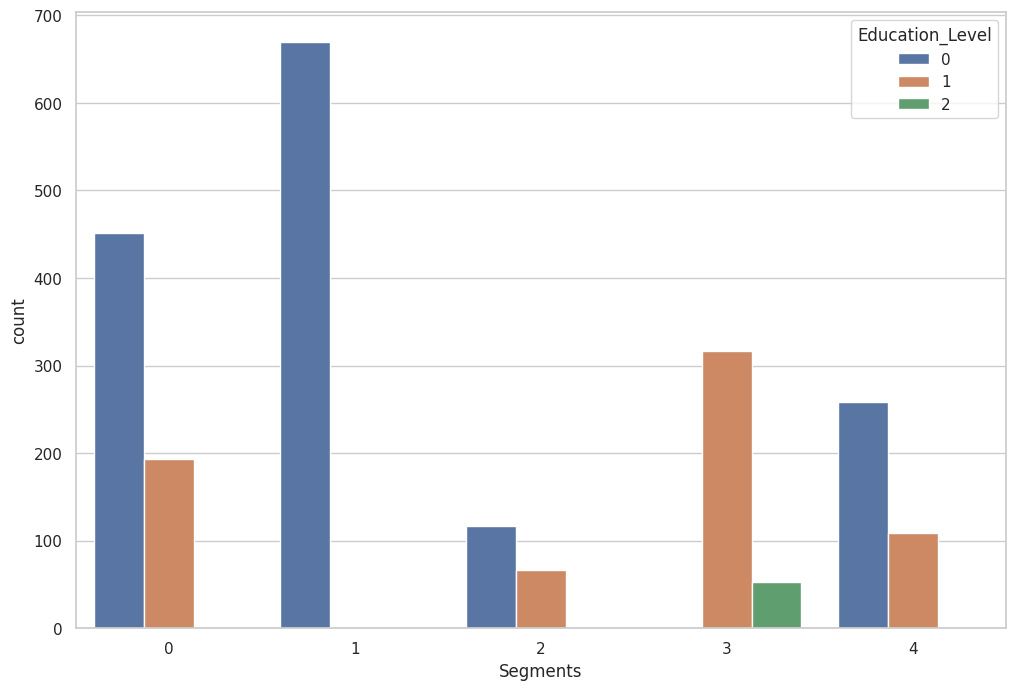

In [61]:
# Lets see how  many customers from each cluster has what kind of education level

plt.figure(figsize=(12, 8))
sns.countplot(x='Segments', data=data_segment, hue='Education_Level')
plt.show()

 -  Cluster 0 has both high and mid educated people.
 -  Cluster 1 has the totally high educated people.
 -  Cluster 2 has least number of educated people.
 -  Cluster 3 has mostly mid and low-educated people.
 -  Cluster 4 has both high and mid educated people.

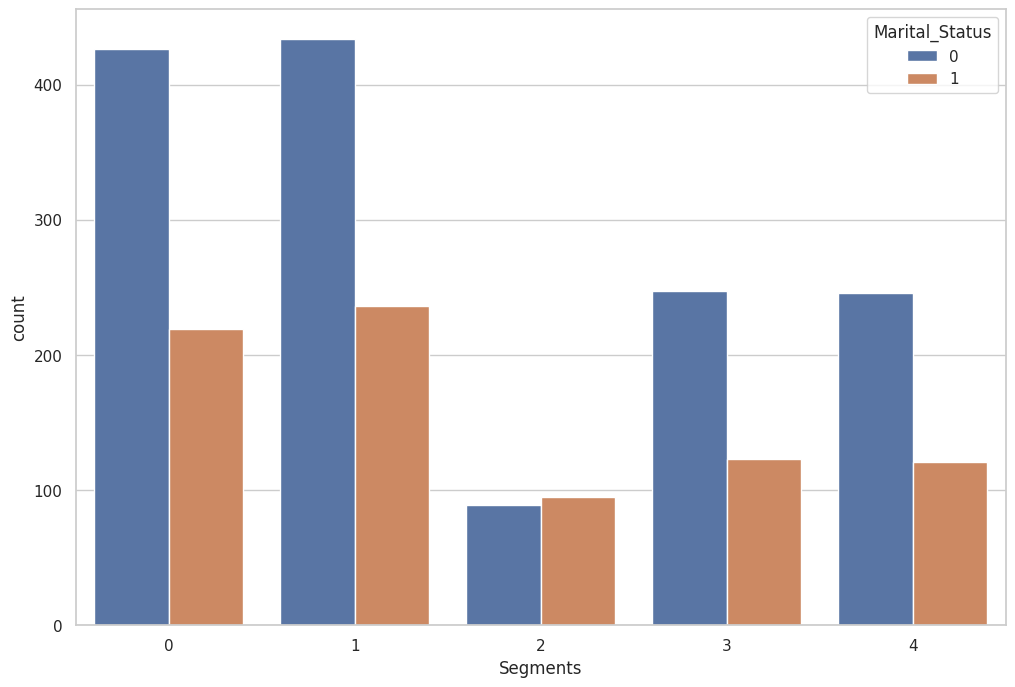

In [62]:
# Segments vs Marital_Status

plt.figure(figsize=(12, 8))
sns.countplot(x='Segments', data=data_segment, hue='Marital_Status')
plt.show()

 - Cluster 0,1,3 and 4 have mostly married Customers.
 - Cluster 2 has nearly same number of married and single customers.

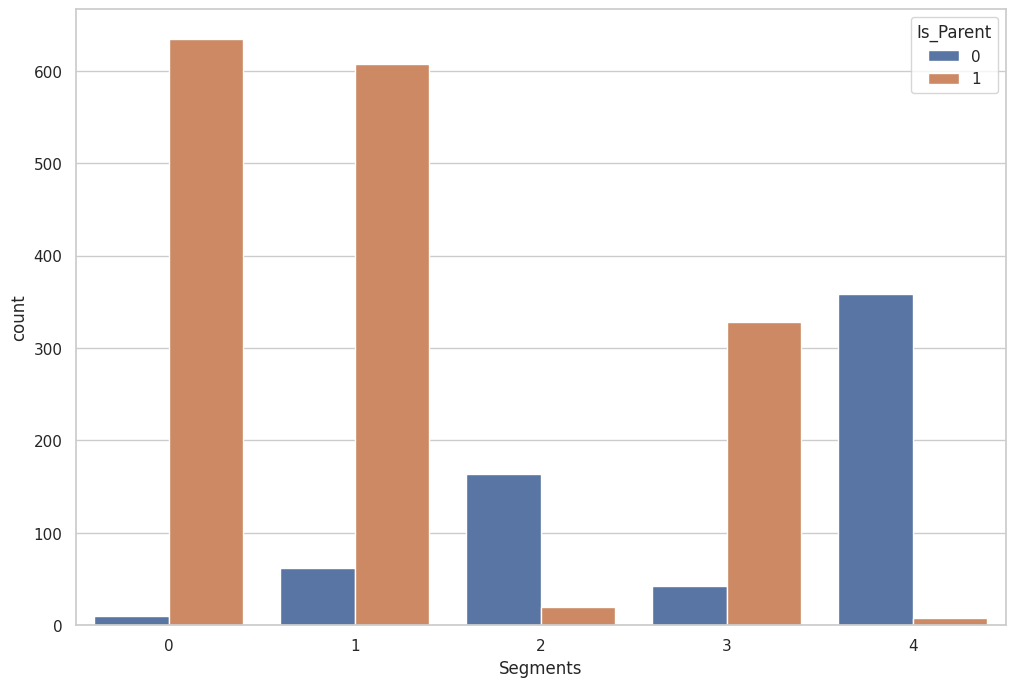

In [63]:
#Segments Vs ISparent

plt.figure(figsize=(12, 8))
sns.countplot(x='Segments', data=data_segment, hue='Is_Parent')
plt.show()

 - Cluster 0,1 and 3 has more number of parent customers.
 - Cluster 2 and 4 has no parents.

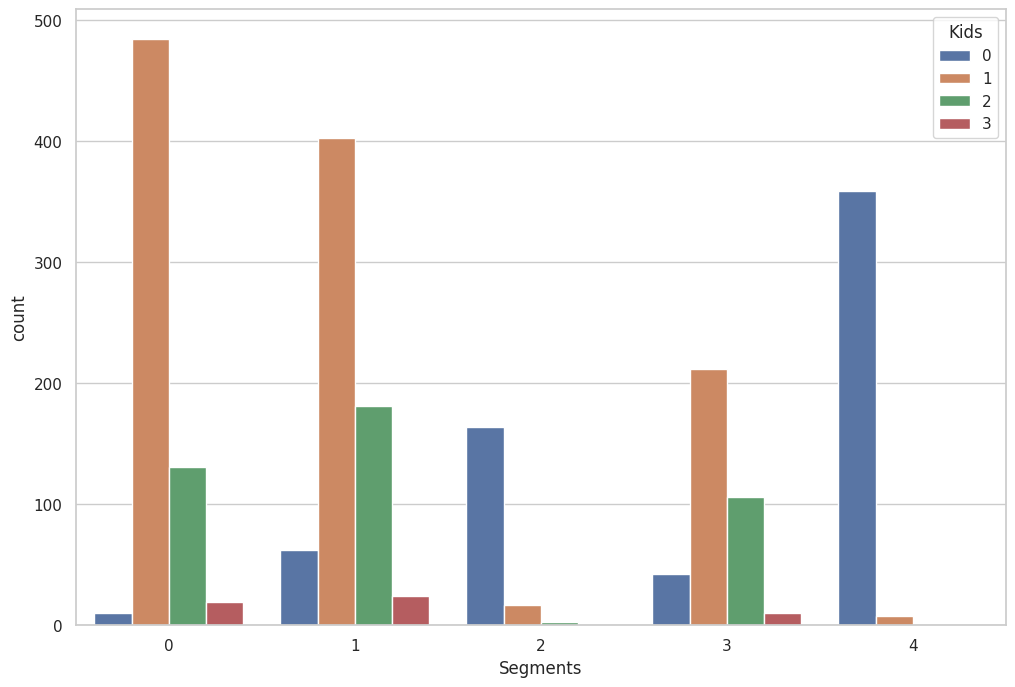

In [64]:
# Now lets findout how  many customers from each cluster has exact number of kids or teens in household

plt.figure(figsize=(12, 8))
sns.countplot(x='Segments', data=data_segment, hue='Kids')
plt.show()

 - Cluster 0,1 and 3 have mostly one kids.
 - Cluster 2 and 4 has mostly no kids.

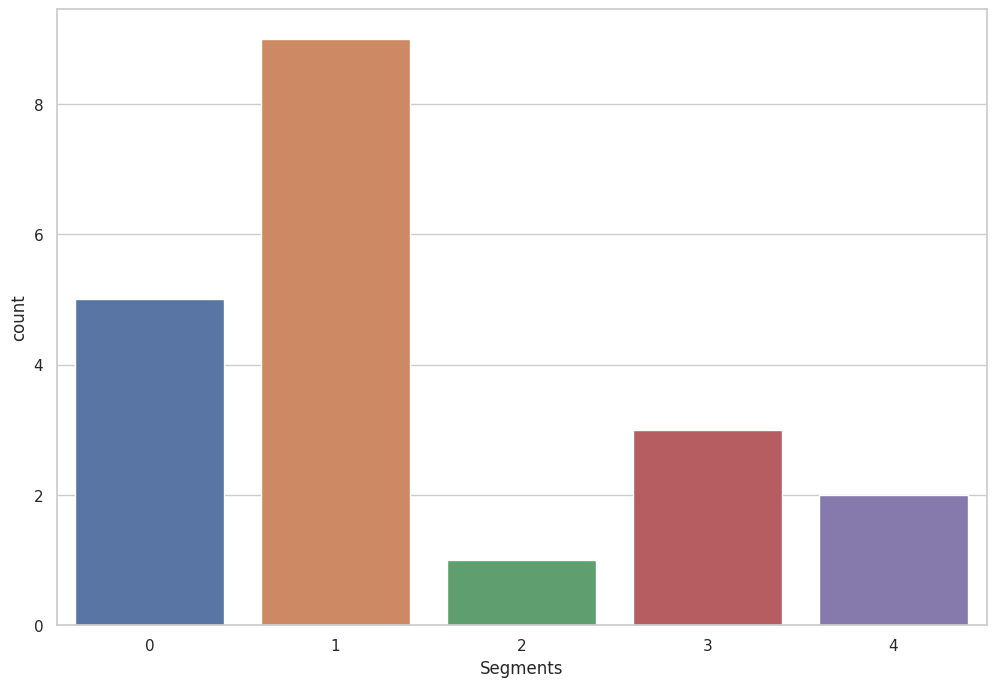

In [65]:
# Now lets findout how  many customers from each cluster have complained

plt.figure(figsize=(12, 8))
sns.countplot(x='Segments', data=data_segment[data_segment['Complain']==1])
plt.show()

 -  Cluster 1 have the highest complains compared to other clusters.
 -  Cluster 2 has the least complaints.

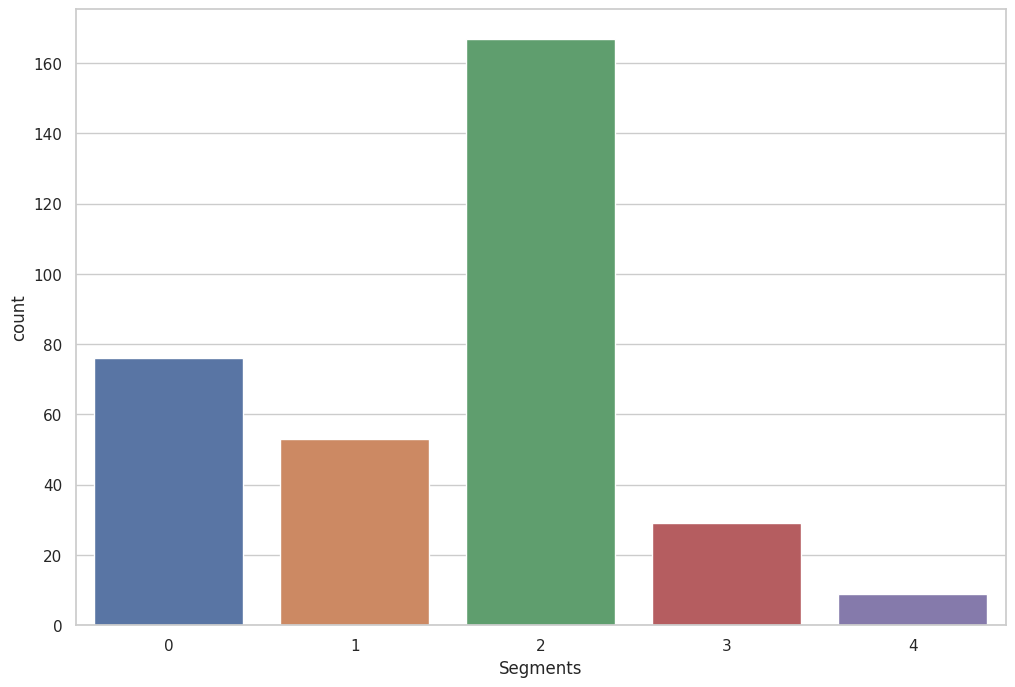

In [66]:
# Now lets findout from each cluster have Responeded

plt.figure(figsize=(12, 8))
sns.countplot(x='Segments', data=data_segment[data_segment['Response']==1])
plt.show()

  - Cluster 2 has  the highest Respones.
  - Cluster 4 has the least Responses.

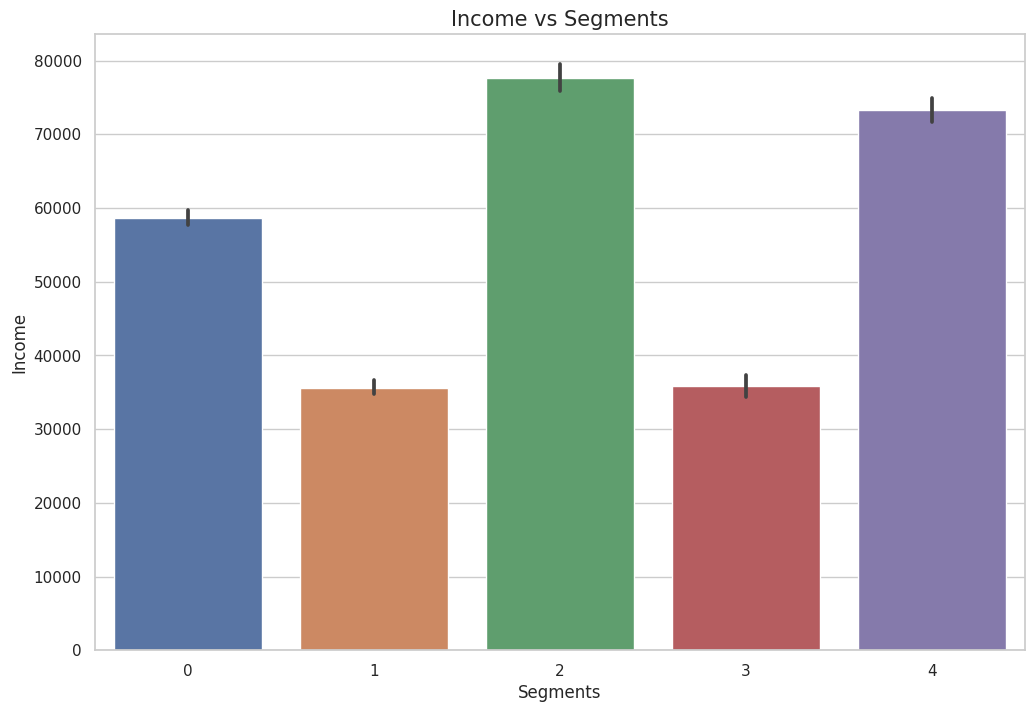

In [67]:
# Lets findout income of customers with in clusters

plt.figure(figsize=(12, 8))
sns.barplot(x=data_segment["Segments"], y=data_segment["Income"])
plt.title("Income vs Segments", size=15)
plt.show()

 - Cluster 2 has the highest Income.
 - Cluster 1 and 3 has the least Income.

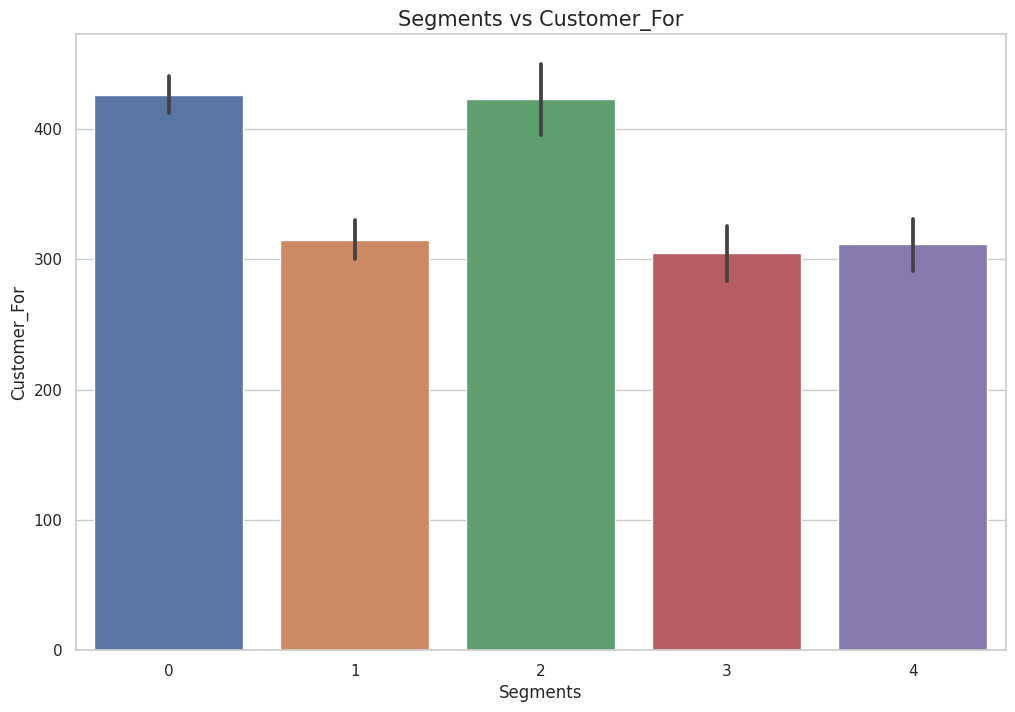

In [68]:
# Lets findout customers for with in clusters

plt.figure(figsize=(12, 8))
sns.barplot(x=data_segment["Segments"], y=data_segment["Customer_For"])
plt.title("Segments vs Customer_For", size=15)
plt.show()

 - Cluster 0 and 2 are the Longest time customers than 1,3 and 4.

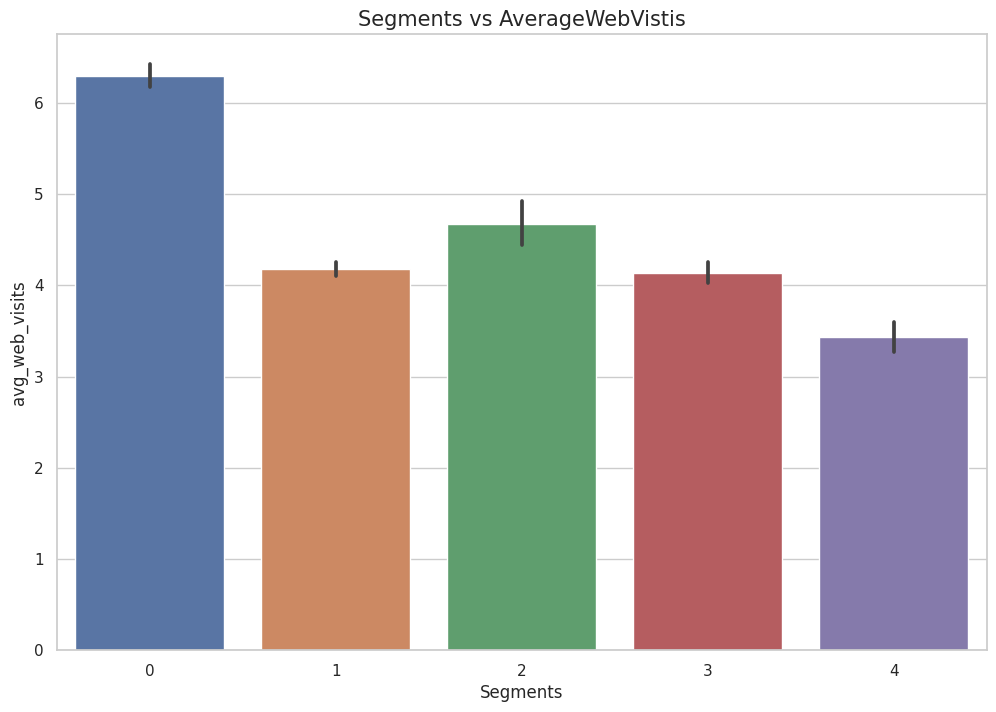

In [69]:
# Lets findout Segments of customers Average Web Visits.

plt.figure(figsize=(12, 8))
sns.barplot(x=data_segment["Segments"], y=data_segment["avg_web_visits"])
plt.title("Segments vs AverageWebVistis", size=15)
plt.show()

 - Cluster 0 has highest average web vistis compared to 1,2,3 and 4.

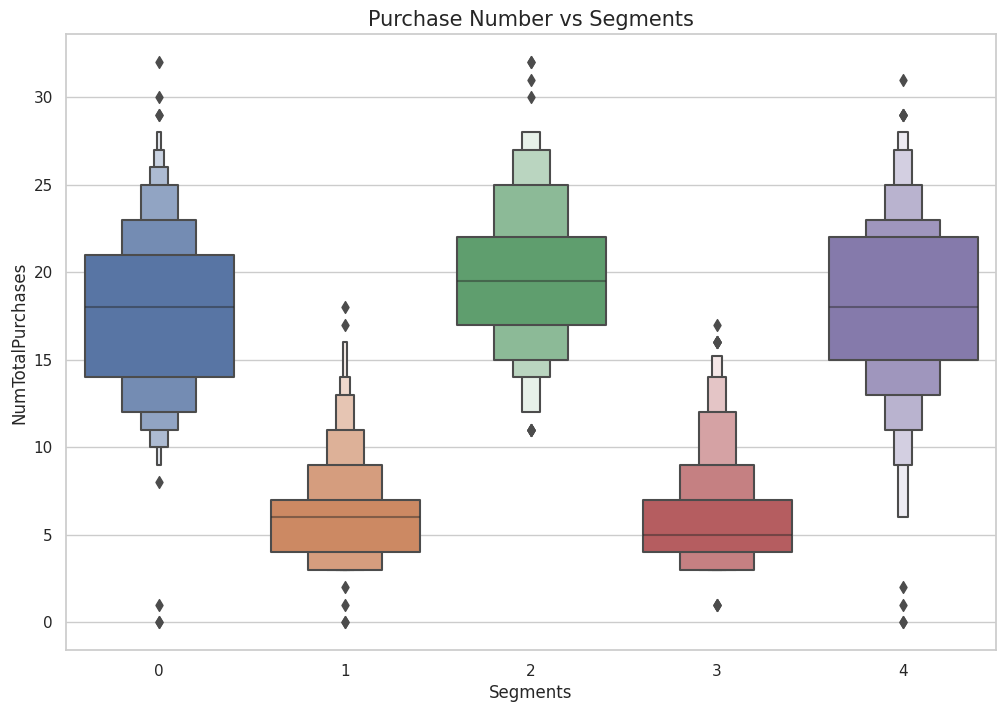

In [70]:
#Segments vs NumTotalPurchases

plt.figure(figsize=(12, 8))
sns.boxenplot(x=data_segment["Segments"], y=data_segment["NumTotalPurchases"])
plt.title("Purchase Number vs Segments", size=15)
plt.show()

 - Cluster 0, 2 and 4 of purchasing behaviour pattern is similar.
 - Cluster 1 and 3 have the same purchasing behaviour.

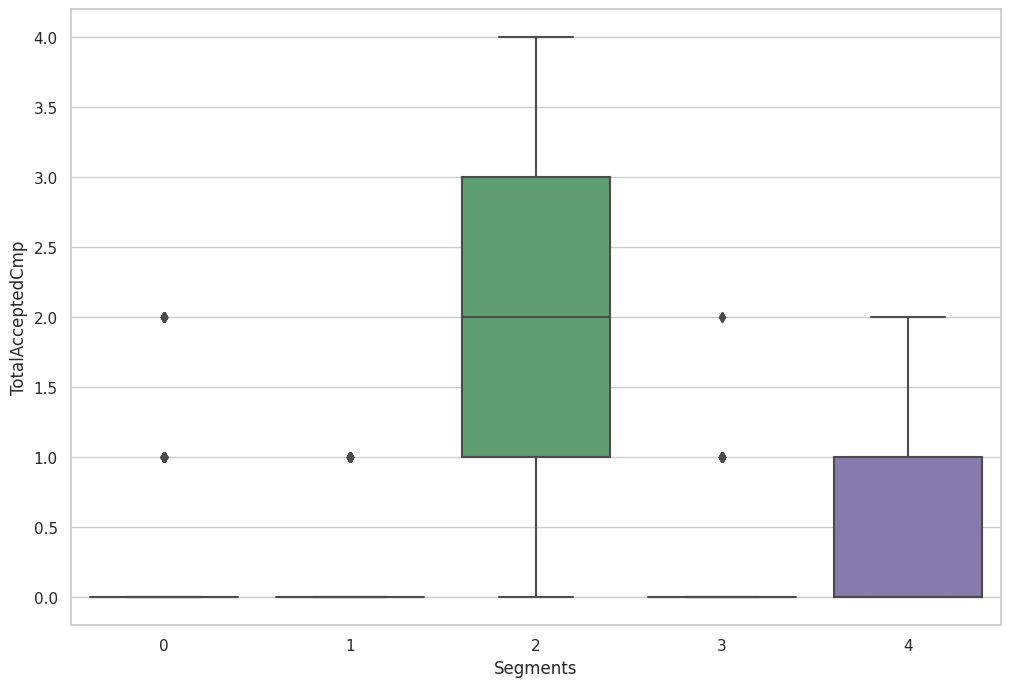

In [71]:
#Segments vs TotalAcceptedCmp

plt.figure(figsize=(12, 8))
sns.boxplot(x=data_segment["Segments"], y=data_segment["TotalAcceptedCmp"])
plt.show()

 - Cluster 2 has accepted more number of campaings.
 - Cluster 4 has accepted less number of campaings.
 - Cluster 0,1 and 3 has not accepted any campaigns.

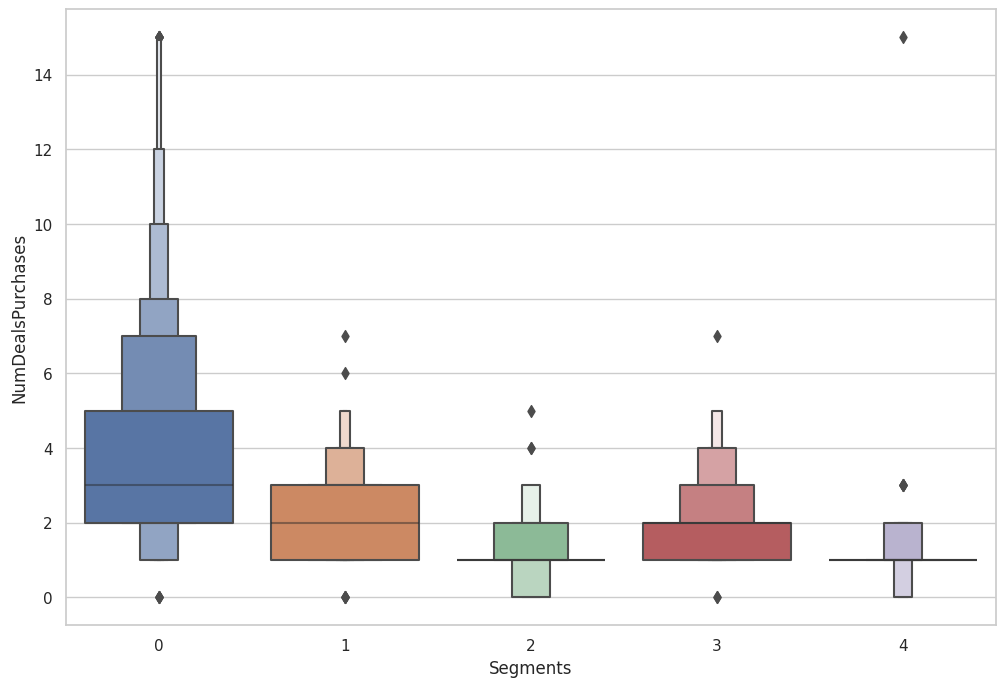

In [72]:
#Segments vs NumDealPurchases

plt.figure(figsize=(12, 8))
sns.boxenplot(x=data_segment["Segments"], y=data_segment["NumDealsPurchases"])
plt.show()

 - Cluster 0 has highest number of purcheses with discount.
 - Cluster 1 and 3 have a medium number of purchases with discounts.
 - Cluster 2 and 4 has lowest number of purchases with discounts.

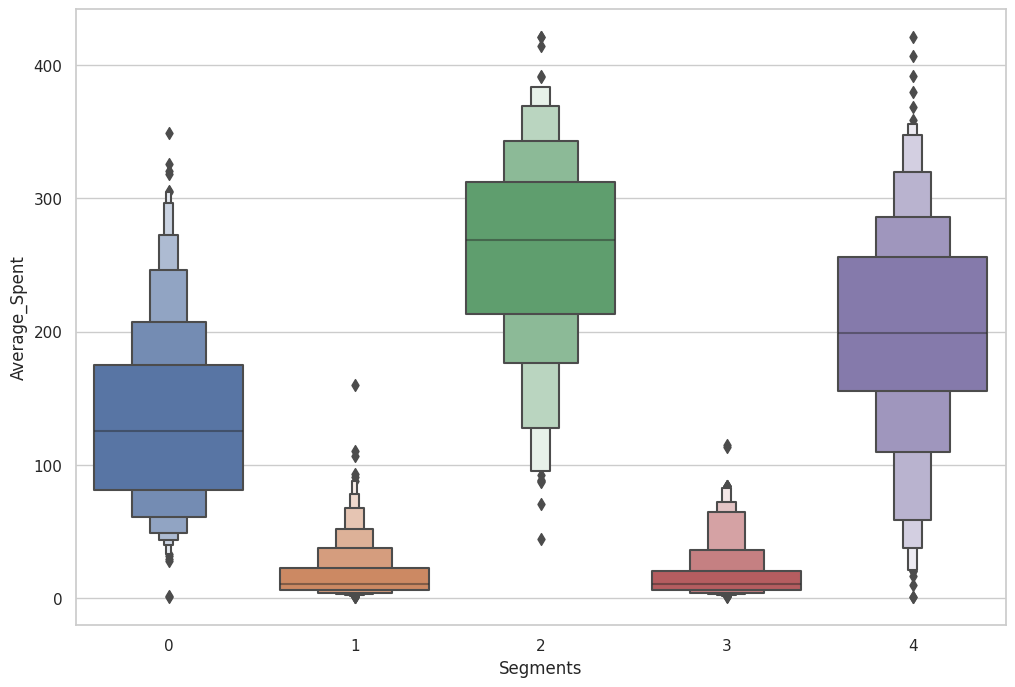

In [73]:
#Segments vs Average_Spent

plt.figure(figsize=(12, 8))
sns.boxenplot(x=data_segment["Segments"], y=data_segment["Average_Spent"])
plt.show()

 -  Cluster 2 amd 4 has highest average spent customers.
 -  Cluster 0 has second highest average spent customers.
 -  Cluster 1 and 3 has least average spent customers.

Cluster 2 - Elite Customer :

Least number of clusters and least number of educated people.
No parents and no kids.
Has least complaints
Has highest response, income and average spent customers
Accepted more number of campaigns


Cluster 4 - Best Customer :

Has both high and mid educated people
has no parents and no kids
has least response
has highest average spent customers
accepted less number of campaings.


Cluster 0 - Good Customer :

It has 2nd largest number of clusters and highest average spent customers.
Both high and mid educated people.
Mostly one kid and  married customers.
Highest average web visits.
Has not accepted campaigns.


Cluster 3 - Average Customer :

Mostly mid and low educated people,married customers and one kid
 Least income and least average spent customers
Has more number of parent customers.
Medium number of purchases
       

Cluster 1 - Below Average Customer :

Large number of customers among all clusters.
High educated people
Mostly married customers and one kid
Highest complain compared to all clusters.
Least income and average spent customers
Has not accepted campaigns.




###Training & Testing the model

In [74]:
array= data_segment.values
array

array([[1.0000e+00, 5.8138e+04, 3.0000e+00, ..., 7.5000e+00, 2.2000e+01,
        2.0000e+00],
       [1.0000e+00, 4.6344e+04, 2.0000e+00, ..., 3.0000e+00, 4.0000e+00,
        1.0000e+00],
       [0.0000e+00, 7.1613e+04, 1.0000e+00, ..., 6.0000e+00, 2.0000e+01,
        4.0000e+00],
       ...,
       [1.0000e+00, 5.6981e+04, 1.0000e+00, ..., 4.0000e+00, 1.8000e+01,
        4.0000e+00],
       [0.0000e+00, 6.9245e+04, 2.0000e+00, ..., 4.5000e+00, 2.1000e+01,
        0.0000e+00],
       [0.0000e+00, 5.2869e+04, 3.0000e+00, ..., 5.0000e+00, 8.0000e+00,
        3.0000e+00]])

In [75]:
from sklearn.model_selection import train_test_split

x = data_segment.drop('Segments', axis=1)
y = data_segment['Segments']
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3,random_state=24)


In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming you have X_train, y_train, X_test, y_test as your training and testing data

# Perform feature scaling (optional but can improve accuracy)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Create KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9582712369597616


In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       197
           1       0.96      0.99      0.98       200
           2       0.95      0.93      0.94        60
           3       0.95      0.97      0.96       109
           4       0.96      0.91      0.94       105

    accuracy                           0.96       671
   macro avg       0.96      0.95      0.95       671
weighted avg       0.96      0.96      0.96       671



###SAVING THE MODEL

In [78]:
from sklearn.neighbors import KNeighborsClassifier
import pickle

# Assuming you have X_train, y_train, X_test, y_test as your training and testing data

# Create KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_scaled, y_train)

# Save the model using pickle
filename = 'CPA_final.sav'
pickle.dump(knn, open(filename, 'wb'))

# Load the model from file
loaded_model = pickle.load(open(filename, 'rb'))

# Calculate the accuracy score using the loaded model
result = loaded_model.score(X_test_scaled, y_test)
print(result, '% Accuracy')


0.9582712369597616 % Accuracy
